# AIML Assignment 2: Time Series Analysis on Pollutant Gases
## Problem Statement
![Air Pollution](https://assets.nrdc.org/sites/default/files/styles/header_background/public/health4_26_airpollguide_istock_2796602_900x600px.jpg?itok=vCwn8tgz)

Air pollution is a problem that affects major cities around the world. There are many different types of air pollutants, which usually come in the form of gases like carbon monoxide, carbon dioxide, sulfur dioxide, nitrogen oxides, CFCss, and other chemicals. 

Bad air quality in cities can lead to health problems for residents living there, including respiratory diseases and even death. In fact, according to the World Health Organisation, air pollution accounts for 4.2 million deaths every year [[1]](https://www.who.int/health-topics/air-pollution#tab=tab_1). To keep track of air pollution, governments invest heavily in sensors, which are used to measure the level of air pollution of different pollutants. However, good quality sensors are expensive, and thus governments rely on cheap sensors which have low accuracy. [[2]](https://ink.library.smu.edu.sg/cgi/viewcontent.cgi?article=5536&context=sis_research)

Our task is to create a time series model that is capable of forecasting air pollution levels. If our model can forecast air pollution data with a reasonable accuracy, it would be a valuable tool (more accurate than low quality sensors) for health authorities to guage the impact of air pollution, and warn the public of any health threats. 

To be more concrete, our task is to predict the average sensor response of Carbon Monoxide, Non Metanic HydroCarbons, Nitrogen Oxides, and Ozone. (Note that sensor response is not the same as the concentration.)

### Carbon Monoxide (CO)
Carbon monoxide (CO)—a colorless, odorless, tasteless, and toxic air pollutant—is produced in the incomplete combustion of carbon-containing fuels, such as gasoline, natural gas, oil, coal, and wood. Breathing the high concentrations of CO typical of a polluted environment leads to reduced oxygen (O2) transport by hemoglobin and has health effects that include headaches, increased risk of chest pain for persons with heart disease, and impaired reaction timing. [[3]](https://www.nap.edu/read/10378/chapter/3)

## Data Understanding
The dataset appears to be sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Air+Quality), but with data downsampled from an hourly frequency to a daily frequency, and several features omitted. The description and date range of the data appears to match up, the scales of the data are the same,and even the method of marking missing values is the same. Furthermore, downsampling that dataset leads to a dataset that has a similar size as the one provided. 

If we make an assumption that the data set is the same, we can say that the data was collected from chemical sensor data collected over the course of March 2004 to February 2005. [[4]](https://www.sciencedirect.com/science/article/abs/pii/S0925400507007691?via%3Dihub)

![Operation of a MOS Type Gas Sensor](https://www.figaro.co.jp/en/img/development/handoutai/shikumi.gif)

The sensors used are metal oxide sensors, which use a sensing layer, where gases are either absorbed or desorbed. This reaction causes a change in the conductivity of the material. [[4]](https://www.sciencedirect.com/science/article/abs/pii/S0925400507007691?via%3Dihub). The sensor device then uses this reading to estimate the concentration of that particular gas in the surroundings.

Our dataset contains the following attributes:
| Attribute | Description |
|---|---|
| Date | Day/Month/Year Format, which is different from default Pandas format |
| T | Temperature in Degree Celcius |
| RH | Relative Humidity (%) |
| Gas | Type of Gas Measured: CO (Carbon Monoxide), NMHC (Non Metanic HydroCarbons), NOx (Nitrogen Oxides), O3 (Ozone) |
| Value | Daily Averaged Estimated Concentration of Pollutants. Note that the concentration for Carbon Monoxide would be in a different unit |

Our target attribute would be the `Value` attribute.
## References
- AIML Module Notes
- Hyndman, R.J., & Athanasopoulos, G. (2021) Forecasting: principles and practice, 3rd edition, OTexts: Melbourne, Australia. OTexts.com/fpp3. 
- Statsmodels Documentation
- Pandas documentation
- Scikit Learn documentation
- Wiley Data Analyst Time Series and Forecasting Notes
- [World Health Organisation](https://www.who.int/health-topics/air-pollution#tab=tab_1)
- MAAH, Balz; ZHOU, Zimu; and THIELE, Lothar. A survey on sensor calibration in air pollution monitoring 
deployments. (2018). IEEE Internet of Things. 5, (6), 4857-4870. Research Collection School Of 
Information Systems. 
- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Air+Quality)
- [S. De Vito, E. Massera, M. Piga, L. Martinotto, G. Di Francia,
On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario](https://www.researchgate.net/publication/235641830_On_field_calibration_of_an_electronic_nose_for_benzene_estimation_in_an_urban_pollution_monitoring_scenario)
- [Climate of Italy](https://en.wikipedia.org/wiki/Climate_of_Italy)
- [Nitrogen Oxide Emission Trends for Italy](https://www.statista.com/statistics/809161/nitrogen-oxides-nox-emission-trend-in-italy/)
- [NOx Emissions - European Environment Agency](https://www.eea.europa.eu/data-and-maps/indicators/eea-32-nitrogen-oxides-nox-emissions-1/assessment.2010-08-19.0140149032-3#:~:text=The%20sectors%20responsible%20for%20the,distribution%27%20(contributing%2027%25).)
- [Effect of Environmental Temperature and Humidity
on Different Metal Oxide Gas Sensors at Various
Gas Concentration Levels, Abdulnasser Nabil Abdullah et al 2020 IOP Conf. Ser.: Mater. Sci. Eng. 864
012152](https://iopscience.iop.org/article/10.1088/1757-899X/864/1/012152/pdf)
- [Choosing the order of an ARIMA model](https://arauto.readthedocs.io/en/latest/how_to_choose_terms.html#the-acf-and-pacf-function)
- [Using Pearson Correlation Correctly With Time Series](https://stats.stackexchange.com/questions/133155/how-to-use-pearson-correlation-correctly-with-time-series)

## Library Imports

In [1]:
# Utility
from os import path # We use this to check if a file exists
from tqdm import tqdm # Use this to track how much time each iter of a for loop takes
import warnings # Statsmodels likes to throw out warnings. Some of them are important, some are not
from statsmodels.tools.sm_exceptions import *
from collections import defaultdict 
from statsmodels.api import load # load serialized models

# Statistical Analysis
## General
import numpy as np
import pandas as pd
from scipy import stats

## Time Series
from statsmodels.tsa.seasonal import STL, seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt

## Model Validation
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error


# Graphical Plots
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sns.set()
plt.rcParams['figure.figsize'] = (13, 8)

## Data Ingestion
We will start out by loading in our data. We must take note here that the date formatting of the data does not follow the standard Pandas convention. As such, we must specify the date formatting to convert the date attribute to a datetime.

Since many Pandas time series methods only work if the index of our data is a time series, we will set the date attribute as the index.

Also, we will set all -200 values as missing values, as specified in the dataset source.

In [2]:
df = pd.read_csv("train.csv", na_values=[-200])
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df.set_index("Date", inplace=True)
df.head()

,T,RH,Gas,Value
Date,,,,
2004-03-10,12.020833,54.883334,CO,1316.500000
2004-03-11,9.833333,64.069791,CO,1244.062500
2004-03-12,11.292708,51.107292,CO,1281.562500
2004-03-13,12.866319,51.530903,CO,1330.555556
2004-03-14,16.016667,48.843750,CO,1360.927083


### Pivoting from Long to Wide Format
The form of our data is in a long format. For easier analysis later, we will pivot the data to a wide format, with a column for each row.

In [3]:
df_pivot = pd.pivot(df, values="Value", columns="Gas")
df_pivot[["T", "RH"]] = df[["T", "RH"]].groupby(df.index).mean()

## Exploratory Data Analysis

We then perform an exploratory data analysis of our data. 

### What do we want to find out?
#### General Dataset Information
- How many rows of data are there?
- What is the frequency of the time series data?
- How many features are there, and what do they mean?
- What are the data types of each attribute, and are they correctly represented?

#### Missing Values
- How many missing values are there?
- Why are there missing values?
- What should be done about the missing values?

#### Distribution of Data
- What does the distribution of our data look like, and what does it say about the data?

#### Outlier Analysis
- How many outliers are there in the data?
- Where are the outliers in the data?
- What should be done about outliers?
#### Correlation
- What are the relationships between the various variables?

#### Time Series

- What can be said about the trend and seasonality of the data?
- Is the data stationary?

### General Dataset Information

#### How many rows of data are there?

In [4]:
rows, cols = df.shape
print(f"There are {rows} rows and {cols} attributes in the dataset.")

There are 1312 rows and 4 attributes in the dataset.


In [5]:
rows, cols = df_pivot.shape
print(f"There are {rows} rows and {cols} attributes in the pivoted dataset.")

There are 328 rows and 6 attributes in the pivoted dataset.


#### What is the frequency of the time series data?

In [6]:
df_pivot.index

DatetimeIndex(['2004-03-10', '2004-03-11', '2004-03-12', '2004-03-13',
               '2004-03-14', '2004-03-15', '2004-03-16', '2004-03-17',
               '2004-03-18', '2004-03-19',
               ...
               '2005-01-22', '2005-01-23', '2005-01-24', '2005-01-25',
               '2005-01-26', '2005-01-27', '2005-01-28', '2005-01-29',
               '2005-01-30', '2005-01-31'],
              dtype='datetime64[ns]', name='Date', length=328, freq=None)

There is not explicitly stated frequency. However, we suspect it is daily. We will need to verify this.

In [7]:
len(df_pivot) - len(df_pivot.asfreq("D"))

0

Since `.asfreq("D")` did not make any extra rows in the data, this confirms our hypothesis of a daily frequency.

In [8]:
df_pivot = df_pivot.asfreq("D") # explicitly state a daily frequency

#### How many features are there and what do they mean?

Our dataset contains the following attributes:
| Attribute | Description |
|---|---|
| Date | Day/Month/Year Format, which is different from default Pandas format |
| T | Temperature in Degree Celcius |
| RH | Relative Humidity (%) |
| Gas | Type of Gas Measured: CO (Carbon Monoxide), NMHC (Non Metanic HydroCarbons), NOx (Nitrogen Oxides), O3 (Ozone) |
| Value | Daily Averaged Estimated Concentration of Pollutants in micrograms/milligrams per cubic meter. Note that the concentration for Carbon Monoxide would be in a different unit (milligrams) |

#### What are the data types of each attribute, and are they correctly represented?

In [9]:
df.dtypes

T        float64
RH       float64
Gas       object
Value    float64
dtype: object

We observe no irregularities with regards to the data type.

### Missing Values

#### How many missing values are there?

In [10]:
df.isna().sum()

T        24
RH       24
Gas       0
Value    24
dtype: int64

In [11]:
df_pivot.isna().sum()

Gas
CO      6
NMHC    6
NOx     6
O3      6
T       6
RH      6
dtype: int64

In [12]:
df_pivot.isna().all(axis=1).sum()

6

It appears that there are exactly six days, where all the attributes are missing.

In [13]:
(df_pivot.isna().all(axis=1).sum() / len(df_pivot)) * 100

1.8292682926829267

This constitutes a very small percentage of our data.

#### Why are there missing values?

In [14]:
df_pivot[df_pivot.isna().any(axis=1)]

Gas,CO,NMHC,NOx,O3,T,RH
Date,,,,,,
2004-06-20,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-27,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-15,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-16,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,NaN,NaN,NaN,NaN,NaN,NaN


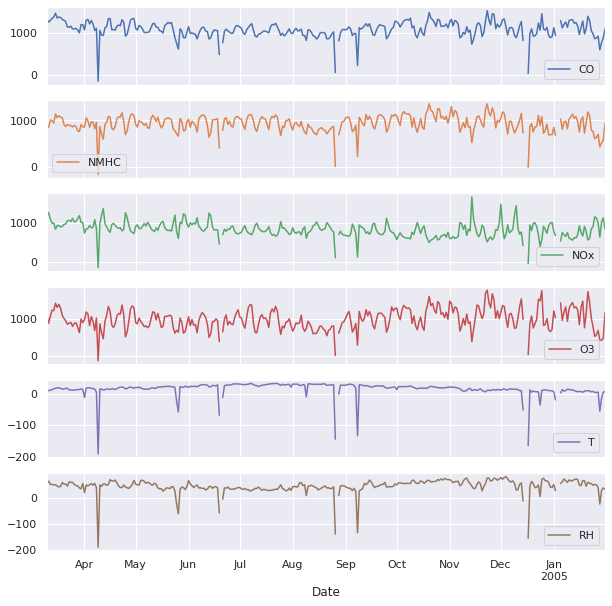

In [15]:
df_pivot.plot(subplots=True, figsize=(10, 10))
plt.show()

We note that days where the missing values do not appear to be related. For some of the days with missing values, we note that the days before and after them have some extreme values, such as extreme spikes.

One possible hypothesis is that the spikes indicate some problem with the sensor used, and thus, the sensors had to be sent for repairs, causing data to be unavailable in the meantime. This would indicate why all the sensors had missing datas on those days.

#### What should be done about missing values?

Based on our hypothesis, if the missing values are due to problems with the sensors that were detected, it may not be a good idea to immediately fill the missing values with the previous value, as it may be an outlier value.

Possible methods:
- Front fill, but mark and deal with outliers first

### Distribution of Data

#### What does the distribution of our data look like, and what does it say about the data?

In [16]:
df_pivot.describe()

Gas,CO,NMHC,NOx,O3,T,RH
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,1074.034862,932.706457,831.478477,997.677396,15.578425,44.343425
std,192.346012,184.942814,200.428180,287.769529,23.412864,28.487081
min,-142.666667,-153.458333,-155.583333,-143.697917,-191.164583,-188.839583
25%,981.338542,839.421875,712.370660,809.098958,12.627083,37.101042
50%,1084.482639,948.649306,826.208333,1005.692708,18.993750,46.452083
75%,1188.539062,1061.109375,944.387153,1183.658854,25.714149,58.028386
max,1513.208333,1355.104167,1678.687500,1795.291667,32.997917,81.104167


- The mean temperature recorded is 15.57 Degrees Celcius, but the min temperature -191.164 degrees celcius. This appears to be an extreme outlier.
- The median temperature is higher than the mean temperature, suggesting a negatively skewed distribution.
- The temperatures seen are mostly consistent with the [climate of Italy](https://en.wikipedia.org/wiki/Climate_of_Italy). This suggests that the temperatures with extreme negative values are actually outliers (possibly sensor miscalibrations), and not the result of extreme cooling in the sensor device.
- The mean relative humidity is 44.34%, which is lower than the median relative humidity. This might suggest a negatively skewed distribution of the data.
- If relative humidity is in percentage, having a negative percentage relative humidity does not make sense. Consider that relative humidity is the **ratio of how much water vapour is in the air and how much water vapor the air could possibly contain at a given temperature**; How is it possible then that it is negative? Logically this must be an error (again, possibly a result of faulty sensors), and any negative values for Relative Humidity should be removed.
- Furthermore, according to the researchers who collected the data, the sensors used are only rated for a temperature of -20 to 50 degrees celcius, and a relative humidity of 10% to 90%. Hence, it is safe to consider any values out of this range as being inaccurate anyways.

![sensor specifications](sensor_specifications.png)

- In our data, we see that there are negative values for each gas as their min estimated concentration
- Recall that for the metal oxide sensors used to collect this data, we get these readings by measuring the change in resistance of the metal oxide material due to a chemical reaction between the metal oxide and the gas and using it to estimate the concentration of pollutants. Thus the "value" attribute in our data is supposed to be an estimated concentration in $\mu/m^3$ (for Nitrogen Oxides and Ozone), or $mg/m^3$ (for Carbon Monoxide)
- As such, a negative concentration does not make any sense. Given that the sensor is only giving a rough estimate of the concentration, it is highly possible that these negative values came about due to sensor errors. 
- The mean values are similar to their median, suggesting that the distribution is not highly skewed; The only outliers come from the negative values.
- Since the values are technically in different units, we may also want to perform scaling of our data.

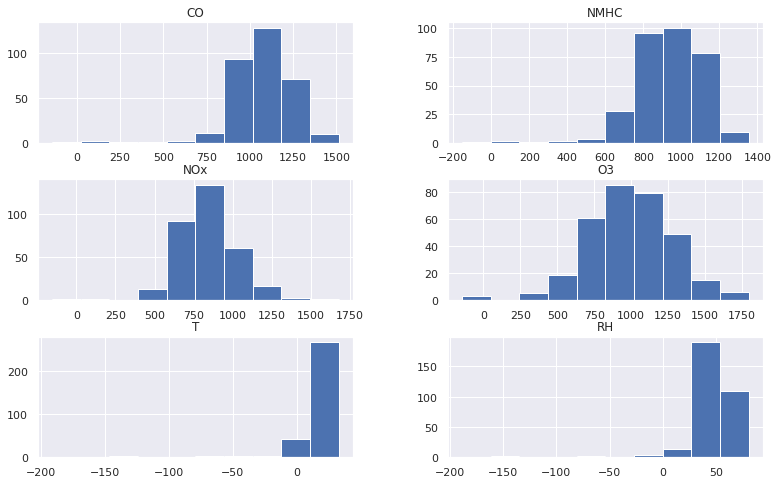

In [17]:
df_pivot.hist()
plt.show()

- We observe that the distribution of Temperature and Relative Humidity is negatively skewed, due to the outlier values
- The distribution of NOx and O3 appear to be more symmetrical
- Distribution of CO and NMHC is more negatively skewed, due to there being some outlier values.

### Outlier Analysis

From our previous analysis, we noted the presense of outliers in all numerical features. We had already come to a few conclusions based on our background research:
- These values are unnatural, and are impossible occurances in real life:
    - The freezing outlier temps are too cold for Italy's, and even too cold for the Artic
    - It is impossible for relative humidity to be negative
    - The sensors used to collect the data, are not rated for these extreme outlier temperatures/humdity
    - A negative concentration (which is what the sensors are trying to estimate), is also ridiculous. 
- Thus, we hypothesise that these come as a result of sensor calibration errors, resulting in a wrong sensor reading.

To test this hypothesis, we want to answer a few questions:
1. How many of these extreme outliers are there?
2. When do these outliers happen? Do they happen indepedently, or is there some pattern to the outlier data?

For this, we will use Tukey's Fences to denote any outliers. Recall that by this criterion, an outlier is any data that founds outside the range $[Q_1 - k(Q_3 - Q_1), Q_3 + k(Q_3 - Q_1)]$. We use Tukey's Fences, as this method is applicable to skewed data since it makes no distributional assumptions and it does not depend on a mean or standard 
deviation. In this case, we will look at the extreme outliers, setting $k=3$. We will also mark negative RH and Value as outliers, since in the context here, they are definitely wrong.

We also need to take note that for time series data, we cannot use future information to detect past outliers. Hence, we will detect outliers on a rolling basis.

In [18]:
df_outliers = df_pivot.copy(deep=True)

In [19]:
def mark_outliers(df, col, k=1.5, window=7):
    df_col = df[col].rolling(window)
    upper_quartile = df_col.quantile(.75)
    lower_quartile = df_col.quantile(.25)
    interquartille_range = upper_quartile - lower_quartile
    upper_fence = upper_quartile + (k * interquartille_range)
    lower_fence = lower_quartile - (k * interquartille_range)
    outliers = ~(df[col].between(lower_fence, upper_fence))
    return outliers

Our current outlier detection method also may miss out certain anomalies.

We want to ensure that any 'impossible' values are marked as outliers. These are values which could not possibly be 0, or are actually out of the operating range for the sensor, and thus the result may not be reliable.

In [20]:
additional_outlier_rules = {
        col : df_outliers[col] < 0 for col in ('CO', 'NMHC', 'NOx', 'O3')
} | {
    "T" : (df_outliers['T'] < -20) | (df_outliers['T'] > 50),
    "RH" : (df_outliers['RH'] < 10) | (df_outliers['RH'] > 90)
}

In [21]:
for col in df_outliers.columns:
    outliers = mark_outliers(df_outliers, col, k=3, window=7) # 1 Week Window
    df_outliers[f'Outlier ({col})'] = (outliers) | (additional_outlier_rules[col])
    

In [22]:
df_outliers[filter(lambda x : x.startswith('Outlier'),df_outliers.columns)].any(axis=1).sum()

72

In [23]:
df_outliers[filter(lambda x : x.startswith('Outlier'),df_outliers.columns)].sum()

Gas
Outlier (CO)      43
Outlier (NMHC)    42
Outlier (NOx)     49
Outlier (O3)      41
Outlier (T)       57
Outlier (RH)      51
dtype: int64

There are 72 rows with at least one outlier in total. Since there are at least >40 outliers for each column, it suggests that most days with outliers have more than one attribute with an outlier.

#### Where are the outliers in the data?

In [24]:
def plot_outlier(df, col_name, ax):
    outliers = df_outliers[df_outliers[f'Outlier ({col_name})'] == True]
    print(f"Number of Outliers for {col}:", len(outliers))
    df_outliers.plot(y=col_name, title=f"Outlier Plot of {col_name}", ax = ax)
    ax.scatter(x=outliers.index, y=outliers[col_name], color='r')

Number of Outliers for CO: 43
Number of Outliers for NMHC: 42
Number of Outliers for NOx: 49
Number of Outliers for O3: 41
Number of Outliers for T: 57
Number of Outliers for RH: 51


<ipython-input-25-43aa801458d2>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


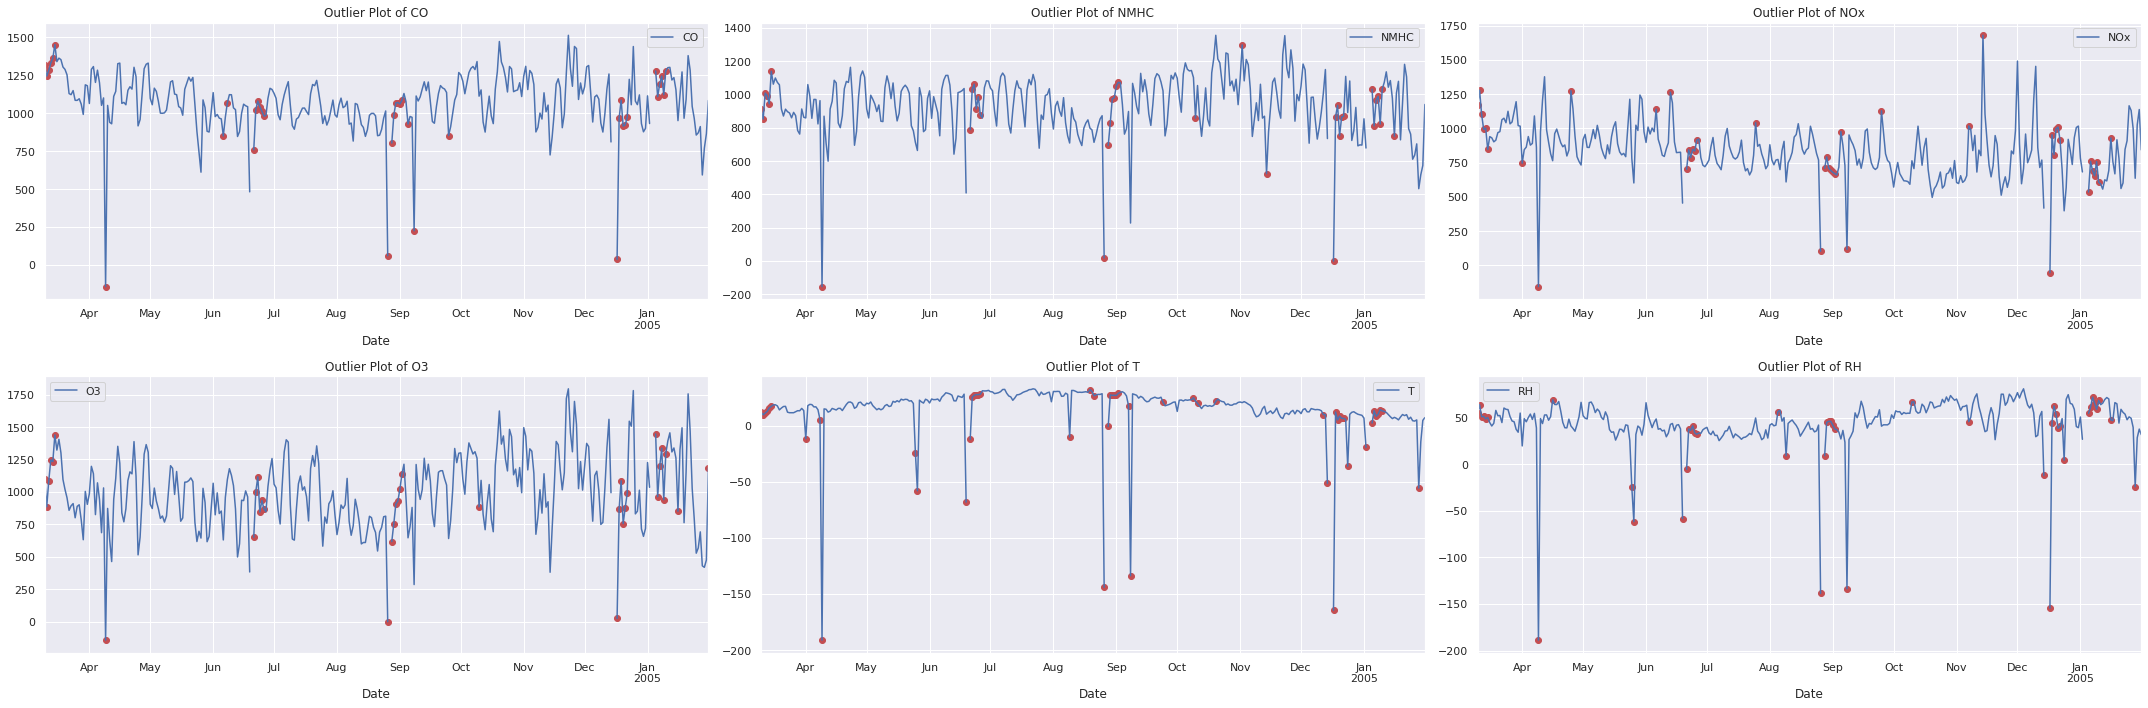

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10), tight_layout=True)

for ax, col in zip(axes.ravel(), df_pivot.columns):
    plot_outlier(df_outliers, col, ax)

fig.show()

- We note that the detected outliers appear to happen at similar points in time to outliers in other features

#### What should be done about outliers?

According to [research](https://iopscience.iop.org/article/10.1088/1757-899X/864/1/012152/pdf), when there are changes in the temperature and relative humidity, it causes a change in the resistance of the sensor, thus causing the readings to drift. This suggest that outside of the operating range of the sensors used (-20 to 50 degrees in Temp, and 10-90% relative humidity), the readings of the sensor would be less accurate. 

There are a few approaches we can take here:
- Ignore the outliers. But this is likely a bad idea, as at the very least, the outlier temperature and relative humidity are definitely wrong.
- Mark the outlier value, and  
    - Impute with the previous value
    - Impute with a rolling mean

For a start, we choose to ignore the extreme outliers, only cleaning the 'impossible' outliers first. Later on we will see what happens when extreme outliers are cleaned.

In [26]:
df_outliers.sum(axis=0)

Gas
CO                345839.225691
NMHC              300331.479173
NOx               267736.069443
O3                321252.121517
T                   5016.252777
RH                 14278.582988
Outlier (CO)          43.000000
Outlier (NMHC)        42.000000
Outlier (NOx)         49.000000
Outlier (O3)          41.000000
Outlier (T)           57.000000
Outlier (RH)          51.000000
dtype: float64

In [27]:
df_basic_clean = df_pivot.copy(deep=True)
for col in df_basic_clean.columns:
    outliers = additional_outlier_rules[col]
    df_basic_clean.loc[outliers, col] = np.nan
print("Before:", df_basic_clean.isna().sum())
df_basic_clean = df_basic_clean.ffill().bfill()
print("After:", df_basic_clean.isna().sum())


Before: Gas
CO       7
NMHC     8
NOx      8
O3       8
T       16
RH      19
dtype: int64
After: Gas
CO      0
NMHC    0
NOx     0
O3      0
T       0
RH      0
dtype: int64


### Correlation
#### What are the relationships between the various variables?

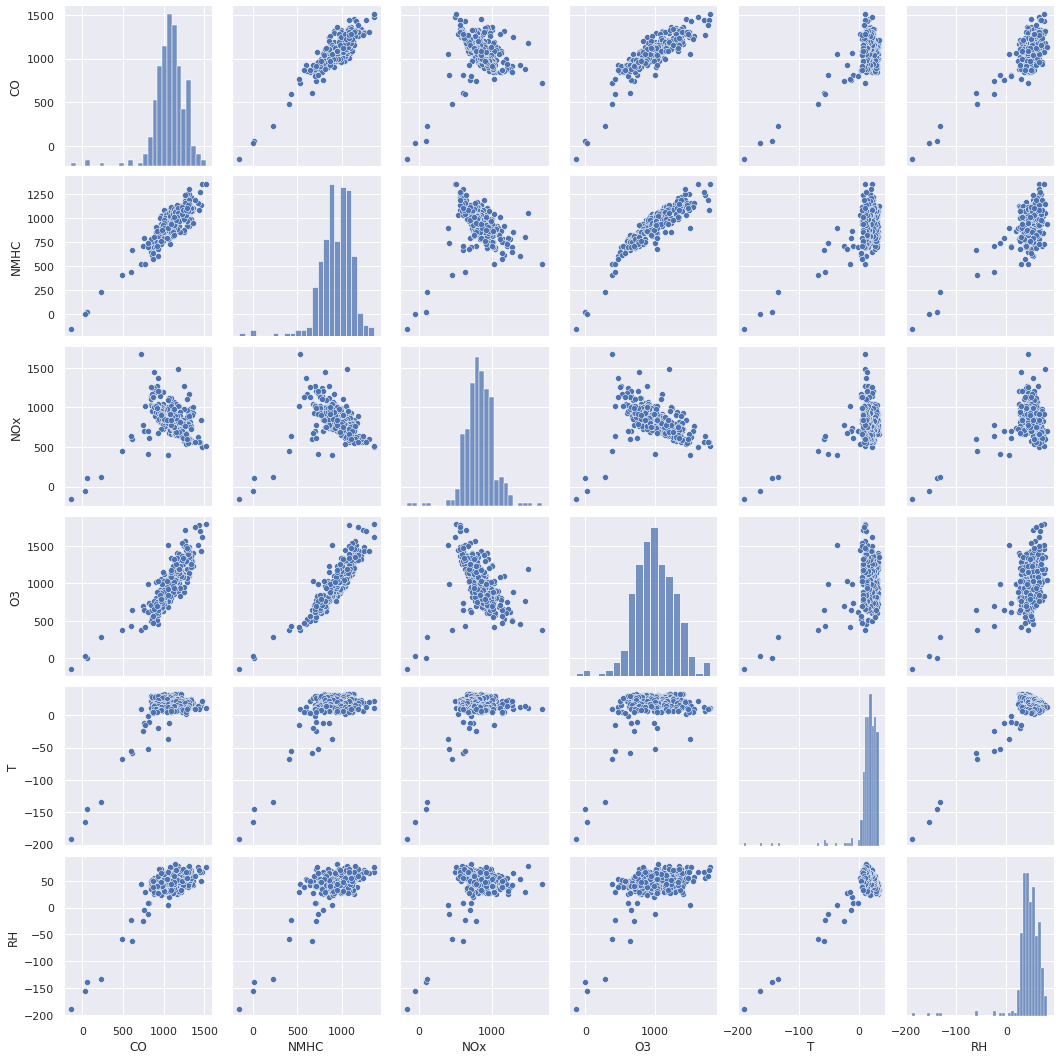

In [28]:
sns.pairplot(df_pivot)

We see that before we cleaned the data, there were many outliers, which do not follow the trend of the data.

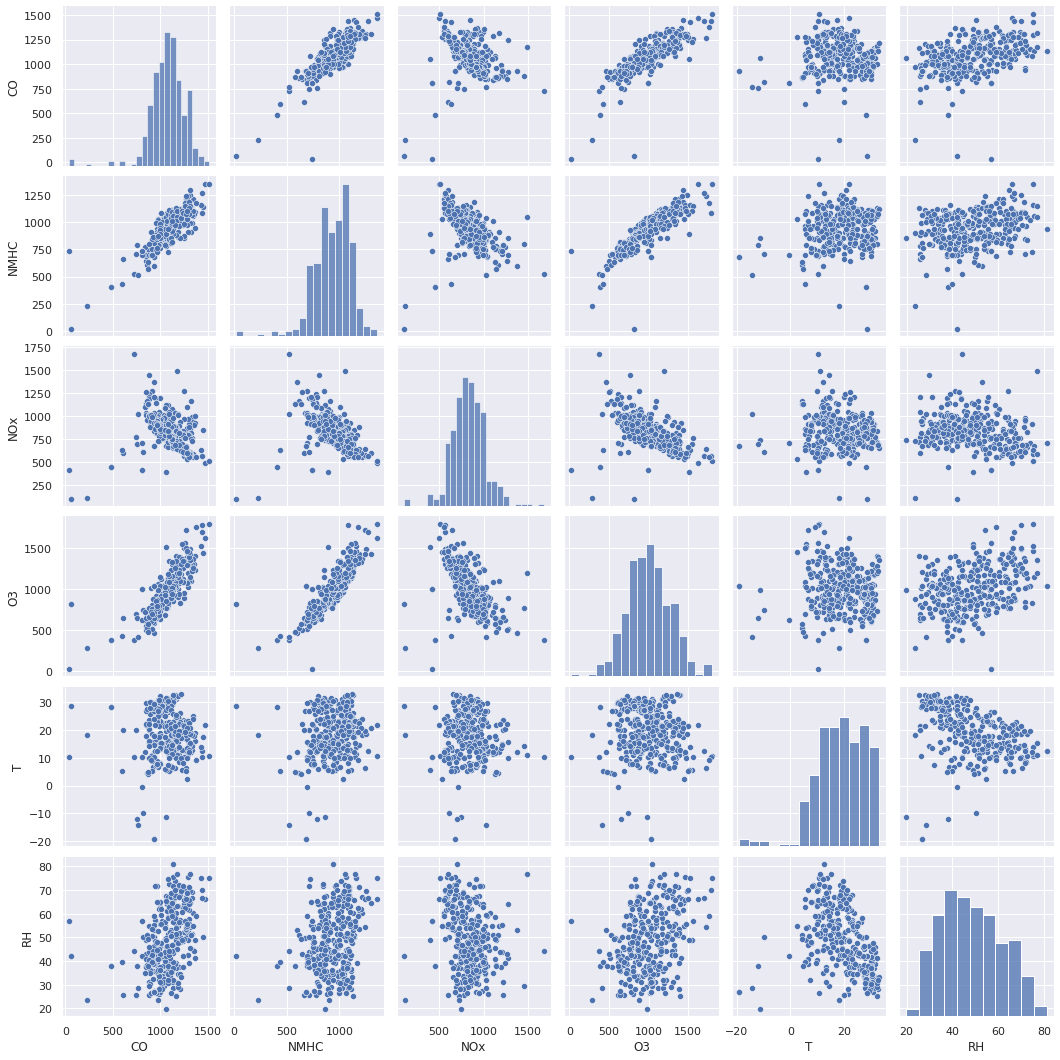

In [29]:
sns.pairplot(df_basic_clean)

To avoid recording spurious correlation (false correlation due to within-series dependence), we will instead calculate correlation based off the percentage change (the differenced data).

To calculate correlation, we use Pearson's correlation coefficient.

<AxesSubplot:xlabel='Gas', ylabel='Gas'>

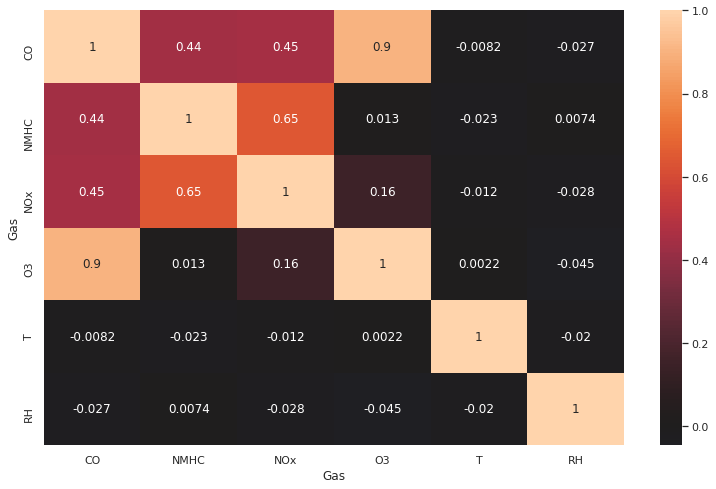

In [30]:
sns.heatmap(df_basic_clean.pct_change().corr(), annot=True, center=0)

- We observe that the change in CO levels is highly correlated with the change in Ozone (r=0.9) and NMHC (r=0.44) levels 

### Time Series

#### What can be said about the trend and seasonality of the data?

To have a clearer understanding of our data, we want to decompose the time series into it's components, which are: the Seasonal Component ($S_t$), the Trend-Cycle component ($T_t$), and the remainder components ($R_t$)

There are two ways which we can decompose our data, additively ($y_t = S_t + T_t + R_t$), or multiplicatively ($y_t = S_t \times T_t \times R_t$). Given that for most our our time series data (except that of Relative Humidity), the variance does not change as the mean changes, an additive model for decomposition makes the most sense. 

To decompose the data, we will use STL decomposition, due to it's advantages over classical decomposition methods. (it allows for the seasonal component to change over time, and is robust to outliers, which is important given that we showed earlier that unusual observations exist in the data). 

##### Temperature (T)

In [31]:
px.line(data_frame=df_basic_clean, y='T')

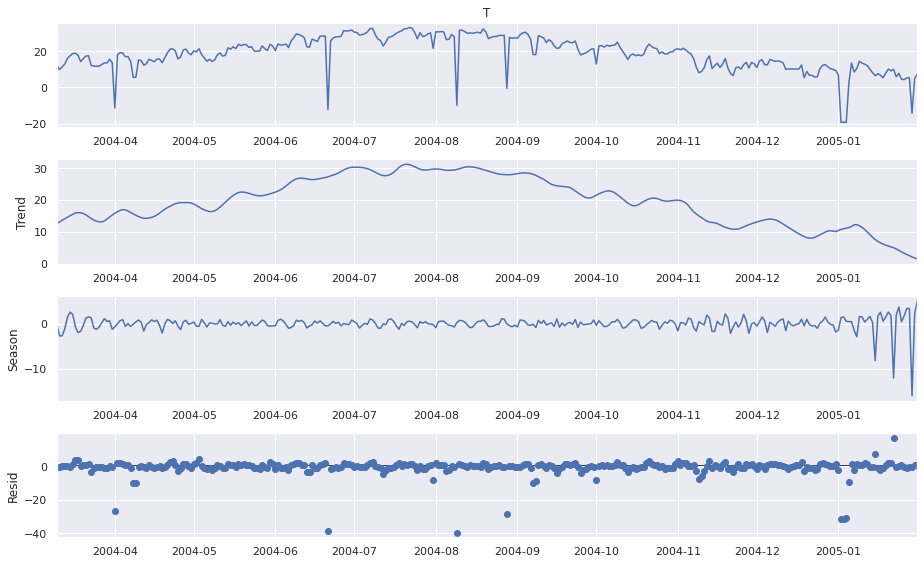

In [32]:
res = STL(df_basic_clean['T'], robust=True).fit()
res.plot()
plt.show()

- There is a upward non-linear trend in temperature from April to August, before the trend changes direction to become downwards. 
- The seasonality in the data does not appear to be very strong, and seems inconsistent.
- The temperature peaked between the months of June and September, where temperature was between 20 to 30 degrees celcius. The peak temperatures occured in July, where some days were above 30 degrees.
- The temperature is the lowest during the start of the year and near the end of the year, which are during the Winter season.
- The mean temperature does not remain constant through the year, but the variance appears to remain constant through the year.

##### Relative Humidity (RH)

In [33]:
px.line(data_frame=df_basic_clean, y='RH')

We note that the variance of the relative humidity appears to increase when the relative humidity increases. This suggests a multiplicative decomposition of the data is appropriate. Since STL decomposition is only additive, we will use classical decomposition methods for this feature.

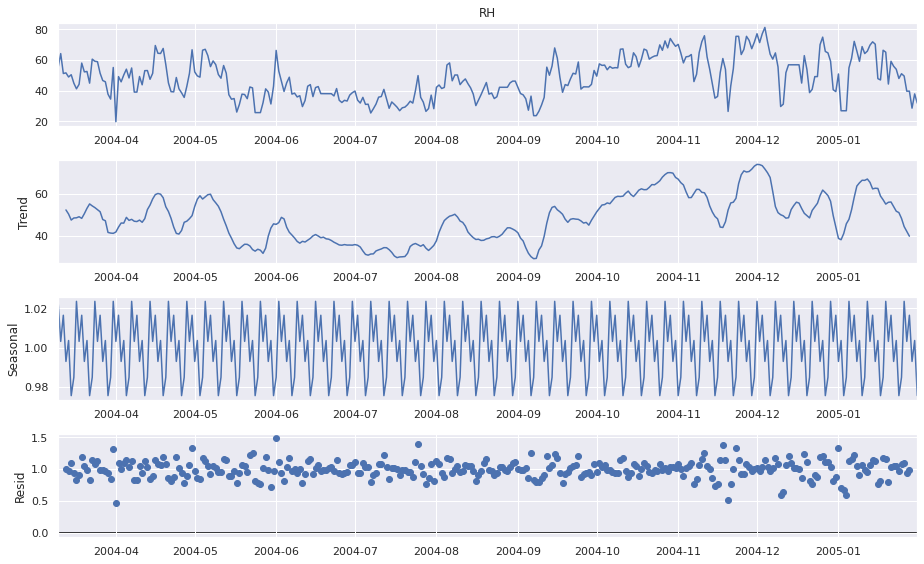

In [34]:
res = seasonal_decompose(df_basic_clean['RH'], 'multiplicative')
res.plot()
plt.show()

- There is a downward trend in relative humidity from April to August, before the trend changes direction to become downwards. The trend appears to be non-linear.
- It is clear that there is strong seasonality in the data, as even the trend appears to follow the seasonality after it is decomposed.
- The mean and variance of the relative humidity do not appear to be constant throughout the year, as the mean and variance of relative humidity appears to be lower during the months of June to September.
- This period of low humidity corresponds to a period of the highest temperatures of the year. This makes sense as **relative humidity is inversely proportional to temperature**
- Thus, the peak period of high relative humidity is also during the coldest parts of the year, during the end and the start of the year.

##### Carbon Monoxide (CO)

In [35]:
px.line(data_frame=df_basic_clean, y='CO')

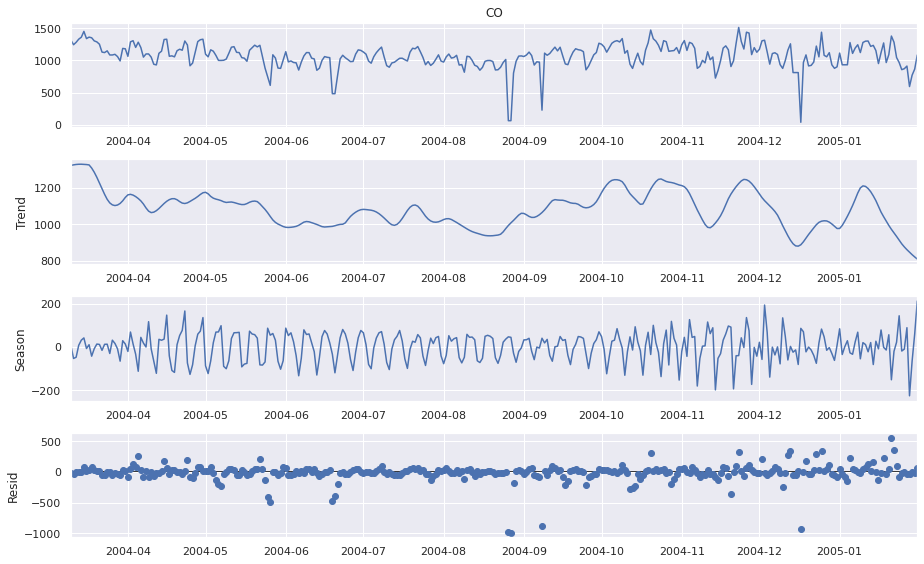

In [36]:
res = STL(df_basic_clean['CO'], robust=True).fit()
res.plot()
plt.show()

- The concentration of CO has a downward non-linear trend from April 2004 to August 2004, before changing direction to a upward trend from September 2004 to January 2005 (but the trend becomes weaker nearing the end of the year)
- There is a seasonality in the data, that appears to repeat every week, where the concentration rises and falls. This could correspond to increased edmissions during the weekdays compared to weekends.
- The concentration of Carbon Monoxide appears to have a constant mean and variance, suggesting that it is stationary.
- On Weekends, it seems that CO concentration is lower, but this requires further statistical testing to verify. This could potentially be due to human sources of CO like vehicle emissions being lower when people are not working, and thus commuting less. 

##### Non-methane Hydrocarbons (NMHC)

In [37]:
px.line(data_frame=df_basic_clean, y='NMHC')

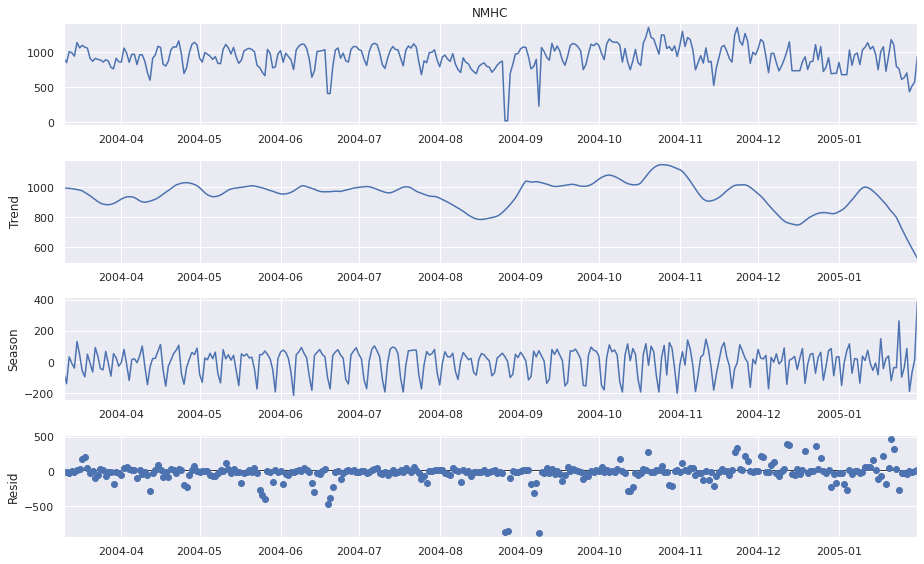

In [38]:
res = STL(df_basic_clean['NMHC'], robust=True).fit()
res.plot()
plt.show()

- The trend for NMHC is very weak, and does not appear to change significantly
- The seasonality is much stronger, with there being a cycle that seemingly corresponds to each week.
- Similarily to that for CO, emissions of NMHC appear to be much lower during the weekends.
- One reason for this is that NMHC is also emitted via human sources like vehicle exhaust, chemical manufacturing and energy production, which might decrease during the weekend, when there is less human activity.

##### Nitrogen Oxides

In [39]:
px.line(data_frame=df_basic_clean, y='NOx')

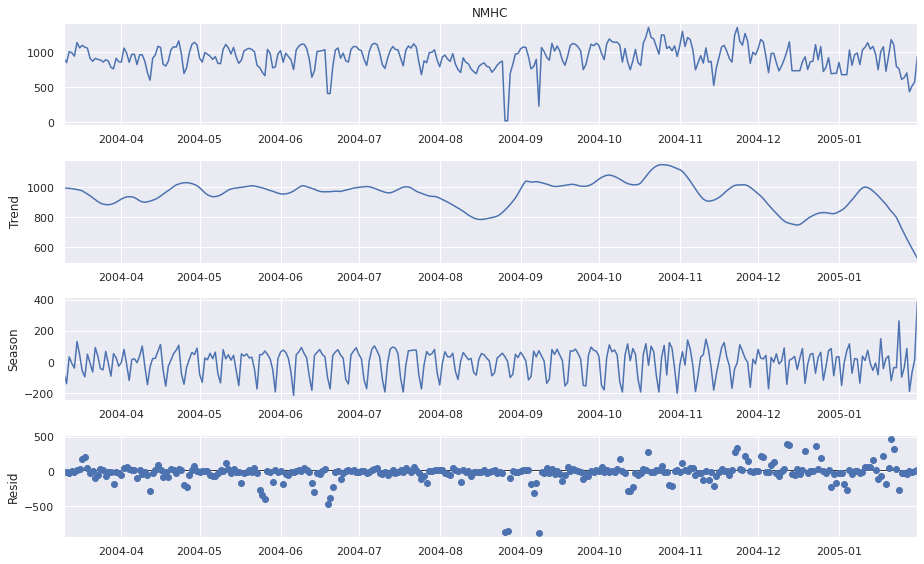

In [40]:
res = STL(df_basic_clean['NMHC'], robust=True).fit()
res.plot()
plt.show()

- For NOx concentrations, the time series does not appear to be stationary, as the mean and variance vary slightly
- There appears to be a small downward trend in the data
- There is a non-linear downward trend between April 2004 to November 2004, before changing directions to an upward trend from December 2004 to January 2001. This suggests that emissions of Nitrogen Oxides have been decreasing over time.
- This is corroborated by referencing the emission trend of Nitrogen oxides in Italy, where there has been a sharp decrease in NOx emissions fromm 2000 to 2018. [Source](https://www.statista.com/statistics/809161/nitrogen-oxides-nox-emission-trend-in-italy/)
- According to the European Environment Agency, this is due to the installation of catalysts to vehicles during this period as per new EU standards, resulting in lower NOx emissions from vehicles. (47% of the reduction in NOx emissions from 1990 and 2011 come from vehicle emissions)  [Source](https://www.eea.europa.eu/data-and-maps/indicators/eea-32-nitrogen-oxides-nox-emissions-1/assessment.2010-08-19.0140149032-3#:~:text=The%20sectors%20responsible%20for%20the,distribution%27%20(contributing%2027%25).)

##### Ozone (O3)

In [41]:
px.line(data_frame=df_basic_clean, y='O3')

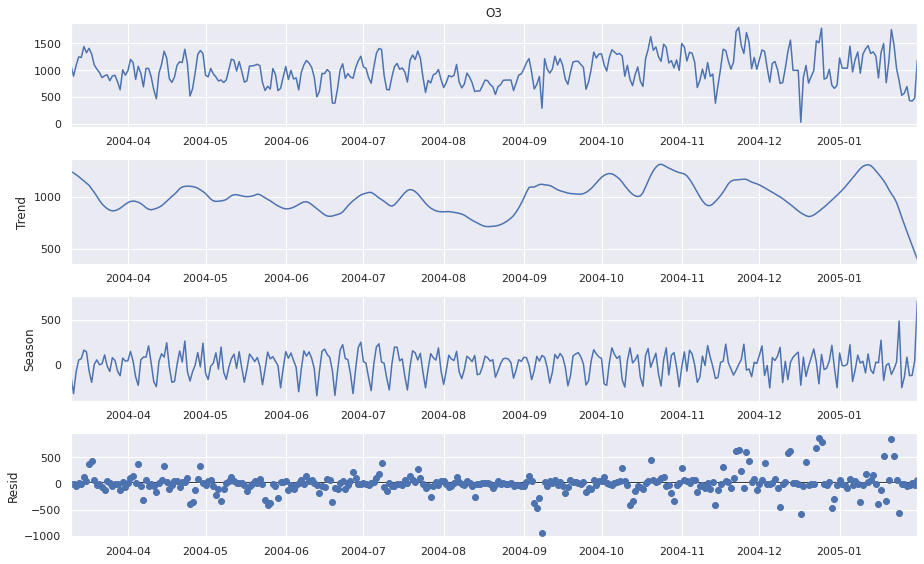

In [42]:
res = STL(df_basic_clean['O3'], robust=True).fit()
res.plot()
plt.show()

- The concentration of Ozone has a downward non-linear trend from April 2004 to August 2004, before changing direction to a upward trend from September 2004 to January 2005.
- The time series appears to have a constant mean, but there is some variation in the variance, such as during the start of the year.
- According to the US Environmental Protection Agency,ground level ozone, is not emitted directly into the air, but is created by chemical reactions between oxides of nitrogen (NOx) and volatile organic compounds (VOC). This happens when pollutants emitted by cars, power plants, industrial boilers, refineries, chemical plants, and other sources chemically react in the presence of sunlight.
- This may explain why the highest levels of Ozone are also the periods of time in which NOx levels are the highest (November to January)
- Strangely, this period is also very cold, and low temperatures should cause levels of Ozone to become lower. Hence it is likely that the increase in Ozone is due to the higher levels of NOx

##### Strength of Trend and Seasonality
It is useful for us to know how strong trend and seasonality are in our time series data, for later model selection and improvement.

[For strongly trended data, the seasonally adjusted data should have much more variation than the remainder component.](https://otexts.com/fpp2/seasonal-strength.html) Therefore $Var(R_t)/Var(T_t+R_t)$ should be relatively small. But for data with little or no trend, the two variances should be approximately the same. So the strength of trend is defined as
$$
F_t = \max (0, 1 - \frac{Var(R_t)}{Var(T_t + R_t)})
$$

Similarily, we define the strength of seasonality as
$$

F_s = \max (0, 1 - \frac{Var(R_t)}{Var(S_t + R_t)})

$$

In [43]:
trends, seasonality, residuals = [], [], []
for feature in df_basic_clean.columns:
    decomposition = STL(df_basic_clean[feature], robust=True).fit()
    trends.append(decomposition.trend)
    seasonality.append(decomposition.seasonal)
    residuals.append(decomposition.resid)

decompose_df = pd.DataFrame({
    "Var_Trend" : [trend.var() for trend in trends],
    "Var_Seasonality + Residual" : [(season + resid).var() for season, resid in zip(seasonality, residuals)],
    "Var_Trend + Residual" : [(trend + resid).var() for trend, resid in zip(trends, residuals)],
    "Var_Residuals":  [resid.var() for resid in residuals],
}, index = df_basic_clean.columns)
decompose_df['Trend Strength'] = decompose_df.apply(lambda feature : max(0, 1 - (feature['Var_Residuals'] / feature['Var_Trend + Residual'])), axis = 1)
decompose_df['Seasonal Strength'] = decompose_df.apply(lambda feature : max(0, 1 - (feature['Var_Residuals'] / feature['Var_Seasonality + Residual'])), axis = 1)

decompose_df

,Var_Trend,Var_Seasonality + Residual,Var_Trend + Residual,Var_Residuals,Trend Strength,Seasonal Strength
Gas,,,,,,
CO,10102.413936,23584.996228,35158.044584,21936.446830,0.376062,0.069898
NMHC,9388.893215,23747.347272,26748.766489,18336.321271,0.314498,0.227858
NOx,11085.555527,27198.962947,34876.283974,24251.980823,0.304628,0.108349
O3,22094.398174,52172.255083,65342.591996,39294.674300,0.398636,0.246828
T,56.985568,27.794144,82.386004,27.205173,0.669784,0.021190
RH,118.949552,66.441728,174.260273,63.499944,0.635603,0.044276


- We see that out of all of the gases, Ozone has the strongest trend and Seasonality, whilst Carbon Monoxide has a strong trend but weak seasonality

## Data Pre-processing
Now, we will proceed to process our data. This will involve transforming our data, and dealing with missing values and outliers.

In [44]:
def DataPreprocess(dataset, train = True, impute=True, remove_outliers=True, advanced_outlier_removal = False):
    missing_days = pd.isnull(dataset).any(axis=1)
    basic_outlier_rules = {
    "T" : (dataset['T'] < -20) | (dataset['T'] > 50),
    "RH" : (dataset['RH'] < 10) | (dataset['RH'] > 90)
}
    if remove_outliers:
        dataset.loc[basic_outlier_rules['T'], 'T'] = np.nan
        dataset.loc[basic_outlier_rules['RH'], 'RH'] = np.nan
        if train:
            additional_outlier_rules = {
            col : dataset[col] < 0 for col in ('CO', 'NMHC', 'NOx', 'O3')
    } 
            for col in dataset.columns:
                if advanced_outlier_removal:
                    outliers = mark_outliers(dataset, col, k=3, window=7)
                    is_outlier = outliers
                    dataset.loc[is_outlier, col] = np.nan
                    print("No of Outliers (Advanced Rules) for", col, np.sum(is_outlier))
                else:
                    if col in additional_outlier_rules:
                        is_outlier = additional_outlier_rules[col]
                        dataset.loc[is_outlier, col] = np.nan
                        print("No of Outliers (Basic Filtering) for", col, np.sum(is_outlier))
                        dataset.loc[is_outlier, col] = np.nan
    if impute:
        dataset = dataset.ffill().bfill()
    if not train:
        return dataset, missing_days
    else:
        return dataset

            


In [45]:
df_pivot.describe()

Gas,CO,NMHC,NOx,O3,T,RH
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,1074.034862,932.706457,831.478477,997.677396,15.578425,44.343425
std,192.346012,184.942814,200.428180,287.769529,23.412864,28.487081
min,-142.666667,-153.458333,-155.583333,-143.697917,-191.164583,-188.839583
25%,981.338542,839.421875,712.370660,809.098958,12.627083,37.101042
50%,1084.482639,948.649306,826.208333,1005.692708,18.993750,46.452083
75%,1188.539062,1061.109375,944.387153,1183.658854,25.714149,58.028386
max,1513.208333,1355.104167,1678.687500,1795.291667,32.997917,81.104167


In [46]:
train = DataPreprocess(df_pivot, train=True, remove_outliers=True, impute=True)
train

No of Outliers (Basic Filtering) for CO 1
No of Outliers (Basic Filtering) for NMHC 2
No of Outliers (Basic Filtering) for NOx 2
No of Outliers (Basic Filtering) for O3 2


Gas,CO,NMHC,NOx,O3,T,RH
Date,,,,,,
2004-03-10,1316.500000,912.250000,1167.250000,1096.041667,12.020833,54.883334
2004-03-11,1244.062500,851.802083,1277.187500,885.031250,9.833333,64.069791
2004-03-12,1281.562500,1008.229167,1101.718750,1084.218750,11.292708,51.107292
2004-03-13,1330.555556,992.822917,993.159722,1245.781250,12.866319,51.530903
2004-03-14,1360.927083,943.854167,1001.104167,1234.177083,16.016667,48.843750
...,...,...,...,...,...,...
2005-01-27,911.777778,703.312500,997.059028,691.475694,5.267708,39.614930
2005-01-28,592.864583,434.350694,635.225694,429.375000,5.267708,39.614930
2005-01-29,769.625000,518.093750,1024.666667,418.072917,-14.272917,28.563542


## Modelling

### Evaluation Methodology
To evaluate our models, we will make use of:
- Corrected AIC
- Time Series Cross Validated Root Mean Square Error

### Utility Functions

In [47]:
gases = ['CO', 'NMHC', 'NOx', 'O3']

In [48]:
def adf_test(series, significance_level = 0.05):
    print(f"Test for Stationarity\nSignificance Level: {significance_level}\nH0: There is a unit root (non-stationary time series)\nH1: There is no unit root (stationary time series)")
    test_statistic, pvalue, usedlag, *_ = adfuller(series)
    print(f"P-value: {pvalue:.3f}")
    print(f"Used Lag: {usedlag}")
    if pvalue < significance_level:
        print("Reject H0. There is evidence that the time series is stationary.")
    else:
        print("Fail to reject H0. There is insufficient evidence that the time series is stationary.")
    return test_statistic, pvalue, usedlag

In [49]:
def kpss_test(series, significance_level = 0.05):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        print(f"Test for Stationarity\nSignificance Level: {significance_level}\nH0: Process is trend stationary\nH1: There is a unit root (non-stationary)")
        test_statistic, pvalue, usedlag, *_ = kpss(series, regression="c", nlags="auto")
        print(f"P-value: {pvalue:.3f}")
        print(f"Used Lag: {usedlag}")
        if pvalue < significance_level:
            print("Reject H0. There is evidence that the time series is not stationary.")
        else:
            print("Fail to reject H0. There is insufficient evidence that the time series is not stationary.")
        return test_statistic, pvalue, usedlag

In [50]:
def multi_step_predict(model, existing_data, start, end, model_params = {}):
    """
    Does multi-step time series prediction, where the model is refitted for every new prediction.
    """
    forecasts = []
    data = existing_data
    for date in pd.date_range(start, end):
        cur_model = model(data, **model_params).fit()
        try:
            forecast = cur_model.predict(start=date).values[0]
        except:
            forecast = cur_model.get_prediction(start=date).values[0]
        # forecast = cur_model.forecast(steps=1)
        forecasts.append(forecast)
        data.append(pd.Series(forecast))
    return forecasts, cur_model

In [51]:
def eval_model(model, dataset, model_params = {}, cv = TimeSeriesSplit(5)):
    """
    Function to evaluate a given model. It makes an assumption that the dataset that is passed to it is already pre-processed, or that the model will process it.
    It will return:
    - the model used
    - cross-validated metrics
    - final metrics 
    """
    if 'order' in model_params:
        order = model_params['order']
    else:
        order = (0, 0, 0)
    
    # Cross validate
    cv_metrics = defaultdict(list)
    for train_idx, test_idx in cv.split(dataset):
        train_fold = dataset.iloc[train_idx]
        test_fold = dataset.iloc[test_idx]
        res = model(train_fold, **model_params).fit()
        try:
            cv_metrics['Corrected AIC'].append(res.aicc)
        except Exception as Error:
            print(Error)
        try:
            train_preds = res.predict(start=train_fold.index[0 + order[1]], end=train_fold.index[-1])
        except: # this is mainly for STL forecast, which does not have a predict method
            train_preds = res.get_prediction(start=train_fold.index[0 + order[1]], end=train_fold.index[-1])
        # train_preds = res.forecast(len(train_idx - order[1]))
        rmse_train = np.sqrt(mean_squared_error(train_fold[0 + order[1]:], train_preds))
        cv_metrics['Train RMSE'].append(rmse_train)
        test_preds, _ = multi_step_predict(model, train_fold, test_fold.index[0], test_fold.index[-1], model_params=model_params)
        rmse_test = np.sqrt(mean_squared_error(test_fold, test_preds))
        cv_metrics['Test RMSE'].append(rmse_test)

    # Refit Model to Entire Training Set and Get Corrected AIC
    final_model = model(dataset, **model_params).fit()
    try:
        cv_metrics['Final AICc'] = [final_model.aicc] * cv.get_n_splits()
    except Exception as Error:
        print(Error)
    return final_model, cv_metrics

In [52]:
def parse_results(dataframe):
    cols = [pd.DataFrame(dataframe[col]) for col in dataframe.keys()]
    return pd.concat(cols, axis=1, keys=dataframe.keys())

In [53]:
def generate_file_name(text, extension = "pkl", location = "models", date = False):
    cur_date = pd.to_datetime("now")
    if date:
        return f"{location}/{text}_{cur_date.year}-{cur_date.month}-{cur_date.day}-{cur_date.hour}-{cur_date.minute}-{cur_date.second}.{extension}"
    else:
        return f"{location}/{text}.{extension}"

In [54]:
def overall_perf(results):
    return results.iloc[1, :].droplevel(0)['Test RMSE'].mean()

In [55]:
def record_history(model_name, cv_metrics, gas, past_history = None, save_history = True):
    if past_history is None:
        if save_history is True and path.exists("history.csv"):
            past_history = pd.read_csv("history.csv", index_col=0)
        else:
            past_history = pd.DataFrame(columns=['Model Name', 'Mean Test RMSE', 'Final AICc', 'Gas'])
    cur_result = pd.Series({
        "Model Name" : model_name,
        "Mean Test RMSE" : np.mean(cv_metrics['Test RMSE']),
        "Final AICc" : np.mean(cv_metrics['Final AICc']),
        "Gas" : gas
    })
    history = past_history.append(cur_result, ignore_index=True)
    if save_history:
        history.to_csv("history.csv")
    return history

In [56]:
def ts_plot(data):
    gs = gridspec.GridSpec(2, 2)

    fig = plt.figure(figsize=(15, 8))
    time_plot = fig.add_subplot(gs[0, :])
    time_plot.plot(data)
    time_plot.set_title("Time Plot")
    acf_plot = fig.add_subplot(gs[1, 0])
    plot_acf(data, ax = acf_plot, lags=31)
    pacf_plot = fig.add_subplot(gs[1, 1])
    plot_pacf(data, ax = pacf_plot, lags=31)

    return fig

### Models

#### Exponential Smoothing

In [58]:
Exp_Smoothing_Results = defaultdict(list)
file_names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning) # Silence warning about initialization of model in future versions
    for gas in tqdm(gases):
        final_model, cv_metrics = eval_model(ExponentialSmoothing, train[gas])
        Exp_Smoothing_Results[gas] = cv_metrics
        file_name = generate_file_name(f"ExpSmoothingModel-{gas}", date=False, location="models/ExpSmoothing")
        file_names.append(file_name)
        final_model.save(file_name)
        history = record_history(f"ExpSmoothingModel-{gas}", cv_metrics, gas)
results = parse_results(Exp_Smoothing_Results).describe()

100%|██████████| 4/4 [00:06<00:00,  1.55s/it]


##### Model Analysis

In [59]:
results

CO                                                NMHC  \
      Corrected AIC  Train RMSE   Test RMSE    Final AICc Corrected AIC   
count      5.000000    5.000000    5.000000  5.000000e+00      5.000000   
mean    1634.421720  129.021942  211.062717  3.355024e+03   1661.246374   
std      880.747511   22.897673   62.675659  5.084230e-13    885.304206   
min      544.911815  105.269814  160.666371  3.355024e+03    554.695639   
25%     1083.186681  110.310418  175.177480  3.355024e+03   1109.494178   
50%     1565.743507  123.486124  175.808307  3.355024e+03   1615.393352   
75%     2218.770255  152.628467  231.475794  3.355024e+03   2237.649829   
max     2759.496342  153.414887  312.185632  3.355024e+03   2788.998871   

                                                     NOx              \
       Train RMSE   Test RMSE   Final AICc Corrected AIC  Train RMSE   
count    5.000000    5.000000     5.000000      5.000000    5.000000   
mean   140.544939  204.222223  3340.241747   1664.981574  144.089998   
std     20.245012   55.124265     0.000000    881.732204   15.660556   
min    114.533805  159.746854  3340.241747    569.503413  128.999038   
25%    128.104470  174.968066  3340.241747   1115.494058  130.128607   
50%    138.874823  176.770299  3340.241747   1617.703690  142.644875   
75%    160.140900  213.289324  3340.241747   2216.384466  152.585284   
max    161.070697  296.336574  3340.241747   2805.822245  166.092185   

                                          O3                          \
        Test RMSE   Final AICc Corrected AIC  Train RMSE   Test RMSE   
count    5.000000     5.000000      5.000000    5.000000    5.000000   
mean   210.039201  3388.009431   1769.611938  202.990089  325.401534   
std     61.838963     0.000000    915.227037    7.852085   62.520475   
min    127.126328  3388.009431    622.997534  192.765072  225.112828   
25%    184.857763  3388.009431   1192.574108  200.560717  309.232306   
50%    216.974116  3388.009431   1751.057219  201.233419  347.661349   
75%    224.405118  3388.009431   2336.677539  206.371813  358.647279   
max    296.832678  3388.009431   2944.753290  214.019423  386.353907   

                    
        Final AICc  
count     5.000000  
mean   3608.997874  
std       0.000000  
min    3608.997874  
25%    3608.997874  
50%    3608.997874  
75%    3608.997874  
max    3608.997874

In [60]:
history

,Model Name,Mean Test RMSE,Final AICc,Gas
0,ExpSmoothingModel-CO,211.062717,3355.023956,CO
1,ExpSmoothingModel-NMHC,204.222223,3340.241747,NMHC
2,ExpSmoothingModel-NOx,210.039201,3388.009431,NOx
3,ExpSmoothingModel-O3,325.401534,3608.997874,O3
4,"ARIMA-(1, 0, 0)-CO",203.780849,4235.842233,CO
5,"ARIMA-(1, 0, 0)-NMHC",184.375725,4207.303345,NMHC
6,"ARIMA-(0, 1, 2)-NOx",186.683114,4237.602162,NOx
7,"ARIMA-(0, 1, 2)-O3",292.145983,4471.038997,O3
8,"ARIMA-(1, 0, 1)-NMHC",185.077665,4204.377005,NMHC
9,ExpSmoothingModel-CO,211.062717,3355.023956,CO


- The Exponential Smoothing model for Ozone appears to perform the worse, with a cross-validated RMSE of 321

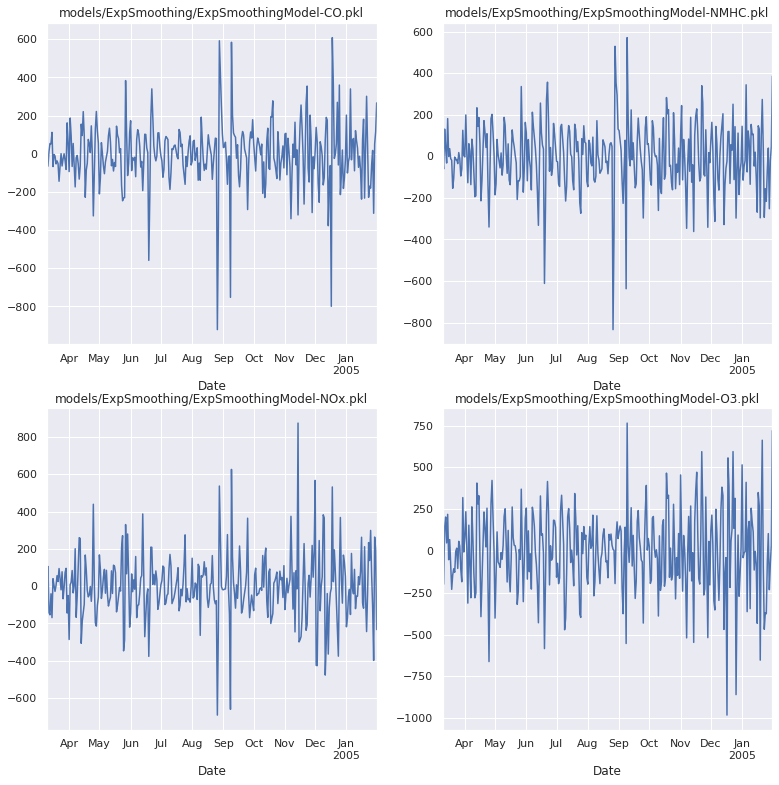

In [61]:
# Plot Residuals for Each Model
fig, ax = plt.subplots(2, 2, figsize=(13, 13))
models = [(load(file), file) for file in file_names]
for model, subplot in zip(models, ax.ravel()):
    model[0].resid.plot(ax=subplot)
    subplot.set_title(model[1])

For the most part, the residuals appear to be homoskedastic.

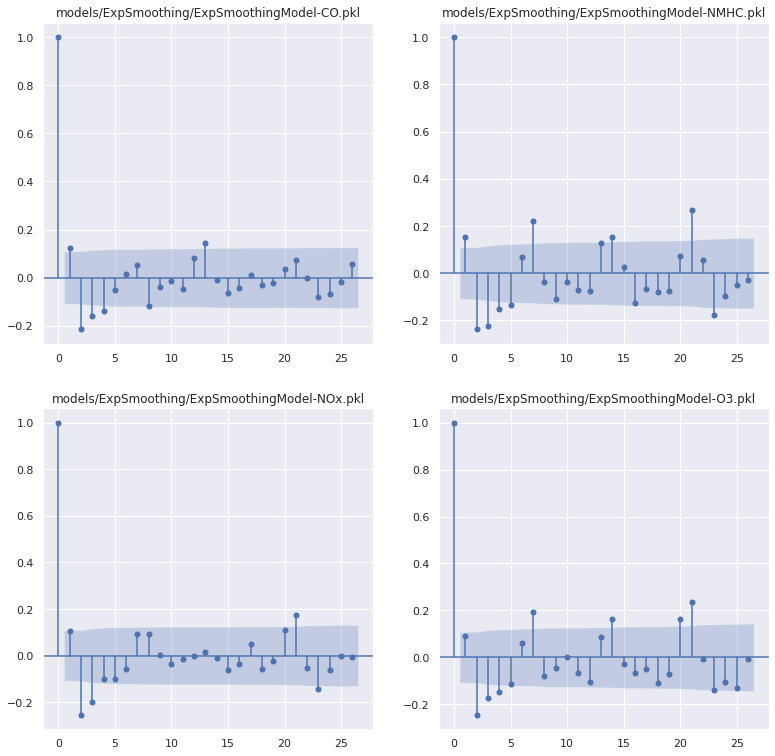

In [62]:
# Plot Autocorrelation of Residuals
fig, ax = plt.subplots(2, 2, figsize=(13, 13))
for model, subplot in zip(models, ax.ravel()):
    plot_acf(model[0].resid, ax=subplot)
    subplot.set_title(model[1])

An ACF plot of the residuals suggests that our forecasts can be improved as the model still does not account for some information, which is left over in the residuals

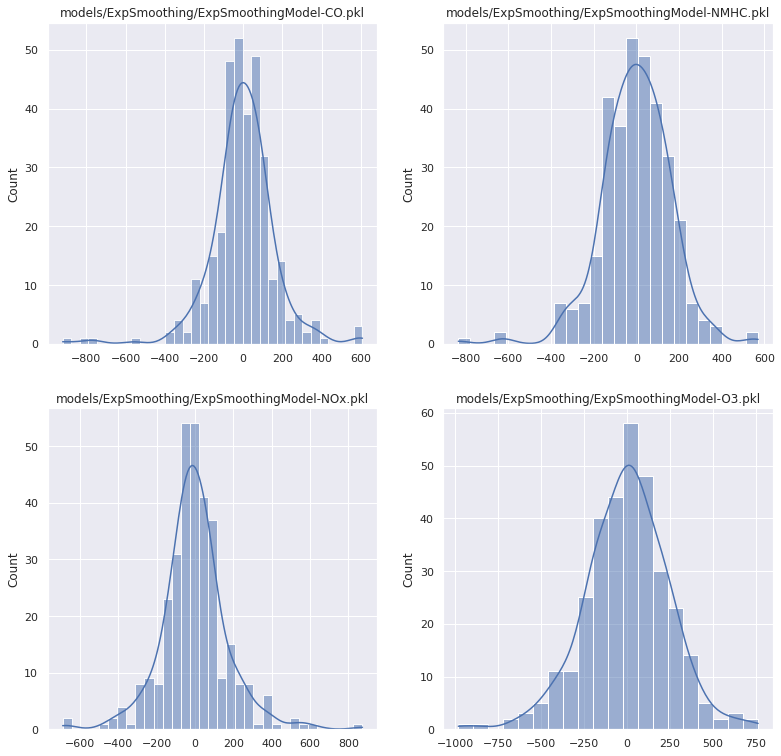

In [63]:
fig, ax = plt.subplots(2, 2, figsize=(13, 13))
for model, subplot in zip(models, ax.ravel()):
    sns.histplot(model[0].resid, ax=subplot, kde=True)
    subplot.set_title(model[1])

The residuals appear to be normally distributed. While not essential, it is preferable for this to be the case.

#### ARIMA

##### Is the Data Stationary?

Before we can engage in modelling, we need to check if our data satisfies certain statistical assumptions that may be made by our models (ARIMA models). This will inform us if further pre-processing is needed. (e.g Differencing is required for our data).

A stationary time series is one whose statistical properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. 

In general, a stationary time series will have no predictable patterns in the long-term. Time plots will show the series to be roughly horizontal (although some cyclic behaviour is possible), with constant variance.

[Source](https://otexts.com/fpp3/stationarity.html)

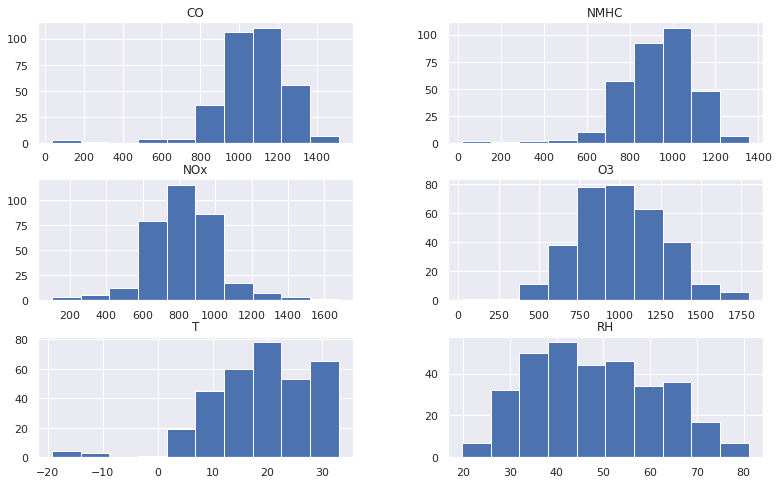

In [64]:
train.hist()
plt.show()

- On a first inspection, it appears that NOx is stationary. It is less clear if the rest are.

In [65]:
grp1 = train[:len(train) // 2]
grp2 = train[len(train) // 2:]

pd.concat([grp1.describe(), grp2.describe()], axis = 1, keys=["Grp1", "Grp2"]).T

count         mean         std         min         25%  \
     Gas                                                            
Grp1 CO    164.0  1070.539168  151.465286  481.753472  988.820313   
     NMHC  164.0   927.128747  134.985533  408.704861  845.799479   
     NOx   164.0   893.988758  149.540845  453.715278  796.906250   
     O3    164.0   938.395664  221.182137  382.131944  797.713542   
     T     164.0    22.043941    8.006580  -12.148958   16.907292   
     RH    164.0    42.732398   10.502532   19.742014   34.805469   
Grp2 CO    164.0  1070.373708  224.413944   36.281250  949.422743   
     NMHC  164.0   935.294398  211.780212   18.552083  811.990451   
     NOx   164.0   764.400089  212.314480  102.520833  644.192708   
     O3    164.0  1064.613842  307.849796   23.541667  834.638889   
     T     164.0    15.350572    8.958539  -19.247917   10.103125   
     RH    164.0    53.801393   13.570700   23.669792   42.797396   

                   50%          75%          max  
     Gas                                          
Grp1 CO    1059.015625  1158.091146  1452.010417  
     NMHC   933.805556  1034.760417  1163.041667  
     NOx    873.776042   975.135417  1376.031250  
     O3     931.322917  1087.466146  1439.041667  
     T       22.357986    28.783594    32.997917  
     RH      41.373785    50.145139    69.340625  
Grp2 CO    1109.421875  1205.656250  1513.208333  
     NMHC   963.611111  1084.477431  1355.104167  
     NOx    733.364583   884.520833  1678.687500  
     O3    1046.812500  1296.317708  1795.291667  
     T       15.054340    21.737326    30.365625  
     RH      55.313715    64.554427    81.104167

- The mean values for Grp 1 and 2 are similar for CO, NMHC, suggesting they are stationary

To tell more concretely if our data is stationary, we will conduct two tests, an Augmented Dickey Fuller Test, and a KPSS test.

###### ADF Test
ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not. The null and alternate hypothesis of this test are:

Null Hypothesis: The series has a unit root.

Alternate Hypothesis: The series has no unit root.

If the null hypothesis failed to be rejected, this test may provide evidence that the series is non-stationary.

[Reference: Statsmodels](https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html)


In [66]:
for gas in train[gases].columns:
    print(gas)
    adf_test(train[gas])

CO
Test for Stationarity
Significance Level: 0.05
H0: There is a unit root (non-stationary time series)
H1: There is no unit root (stationary time series)
P-value: 0.000
Used Lag: 0
Reject H0. There is evidence that the time series is stationary.
NMHC
Test for Stationarity
Significance Level: 0.05
H0: There is a unit root (non-stationary time series)
H1: There is no unit root (stationary time series)
P-value: 0.000
Used Lag: 7
Reject H0. There is evidence that the time series is stationary.
NOx
Test for Stationarity
Significance Level: 0.05
H0: There is a unit root (non-stationary time series)
H1: There is no unit root (stationary time series)
P-value: 0.000
Used Lag: 1
Reject H0. There is evidence that the time series is stationary.
O3
Test for Stationarity
Significance Level: 0.05
H0: There is a unit root (non-stationary time series)
H1: There is no unit root (stationary time series)
P-value: 0.000
Used Lag: 8
Reject H0. There is evidence that the time series is stationary.


- According to the ADF test, all of the gas time series are stationary

###### KPSS Test
KPSS is another test for checking the stationarity of a time series. The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.

Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary).

We apply this test in addition to the ADF test, to ensure that our data is truly stationary.

In [67]:
for gas in train[gases].columns:
    print(gas)
    kpss_test(train[gas])

CO
Test for Stationarity
Significance Level: 0.05
H0: Process is trend stationary
H1: There is a unit root (non-stationary)
P-value: 0.100
Used Lag: 8
Fail to reject H0. There is insufficient evidence that the time series is not stationary.
NMHC
Test for Stationarity
Significance Level: 0.05
H0: Process is trend stationary
H1: There is a unit root (non-stationary)
P-value: 0.100
Used Lag: 7
Fail to reject H0. There is insufficient evidence that the time series is not stationary.
NOx
Test for Stationarity
Significance Level: 0.05
H0: Process is trend stationary
H1: There is a unit root (non-stationary)
P-value: 0.010
Used Lag: 7
Reject H0. There is evidence that the time series is not stationary.
O3
Test for Stationarity
Significance Level: 0.05
H0: Process is trend stationary
H1: There is a unit root (non-stationary)
P-value: 0.025
Used Lag: 8
Reject H0. There is evidence that the time series is not stationary.


For O3 and NOx, we note that KPSS indicates the data is non-stationary, but the ADF test indicates it is stationary. The series is thus inferred to be difference stationary. 

We will difference the data, and check the differenced data for stationarity.

In [68]:
print("Results of KPSS Test on Differenced Series (O3)")
kpss_test(diff(train['O3']))

print("Results of ADF Test on Differenced Series (O3)")
adf_test(diff(train['O3']))

print("Results of KPSS Test on Differenced Series (NOx)")
kpss_test(diff(train['NOx']))


print("Results of ADF Test on Differenced Series (NOx)")
adf_test(diff(train['NOx']))

Results of KPSS Test on Differenced Series (O3)
Test for Stationarity
Significance Level: 0.05
H0: Process is trend stationary
H1: There is a unit root (non-stationary)
P-value: 0.100
Used Lag: 35
Fail to reject H0. There is insufficient evidence that the time series is not stationary.
Results of ADF Test on Differenced Series (O3)
Test for Stationarity
Significance Level: 0.05
H0: There is a unit root (non-stationary time series)
H1: There is no unit root (stationary time series)
P-value: 0.000
Used Lag: 11
Reject H0. There is evidence that the time series is stationary.
Results of KPSS Test on Differenced Series (NOx)
Test for Stationarity
Significance Level: 0.05
H0: Process is trend stationary
H1: There is a unit root (non-stationary)
P-value: 0.100
Used Lag: 68
Fail to reject H0. There is insufficient evidence that the time series is not stationary.
Results of ADF Test on Differenced Series (NOx)
Test for Stationarity
Significance Level: 0.05
H0: There is a unit root (non-stationa

(-11.331600537208386, 1.1092542125978076e-20, 6)

We observe that after detrending via differencing, the KPSS test shows that O3 and NOx are now truly stationary.

##### Selecting the Order of the ARIMA Model

When using an ARIMA model, it is necessary to specify the order of the model -> p, d, q 

p = order of the Auto Regressive part of the model
d = degree of differencing
q = order of the Moving Average part

It is usually not possible to tell, simply from a time plot, what values of p and q are appropriate for the data. However, it is sometimes possible to use the ACF plot, and the closely related PACF plot, to determine appropriate values for p and q.

If the data are from an ARIMA(p, d,0) or ARIMA(0, d, q) model, then the ACF and PACF plots can be helpful in determining the value of p or q. If p and q are both positive, then the plots do not help in finding suitable values of p and q.

The data may follow an ARIMA(p, d,0) model if the ACF and PACF plots of the differenced data show the following patterns:

- the ACF is exponentially decaying or sinusoidal;
- there is a significant spike at lag p in the PACF, but none beyond lag p.

The data may follow an ARIMA(0,d,q) model if the ACF and PACF plots of the differenced data show the following patterns:

- the PACF is exponentially decaying or sinusoidal;
- there is a significant spike at lag q in the ACF, but none beyond lag q.

[Source](https://otexts.com/fpp3/non-seasonal-arima.html)

Hence, we will use the ACF and PACF plot to estimate the models for each gas, to use as a baseline. We will then fit the identified model, and check that the model residuals are white noise.

###### Carbon Monoxide

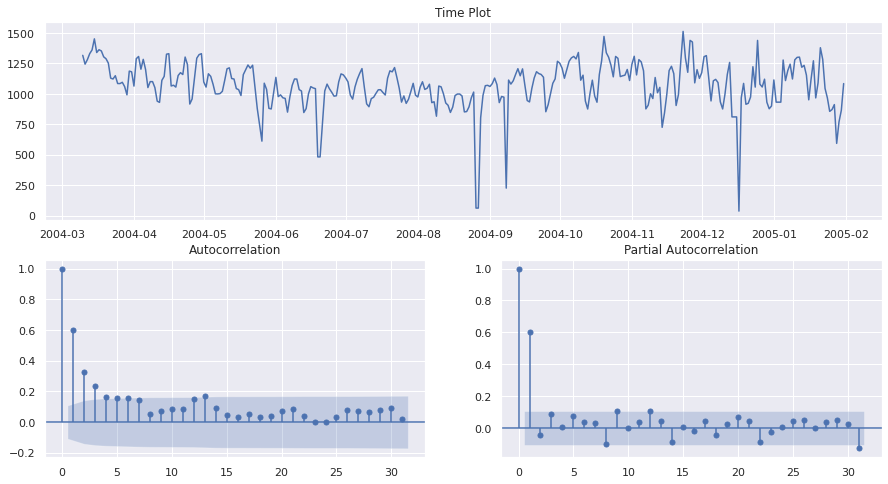

In [69]:
fig = ts_plot(train['CO'])

- Looking at the autocorrelation plot, it appear that the indicated model is an autoregressive model (as the ACF appears to be exponentially decaying)
- Looking then, at the PACF plot, there is a significant spike at lag 1, but none beyond that (there are some lags that are slightly above the confidence interval, but they do not appear to be significant)
- This suggests an ARIMA(1, 0, 0) model

###### Non Metanic Hydrocarbons

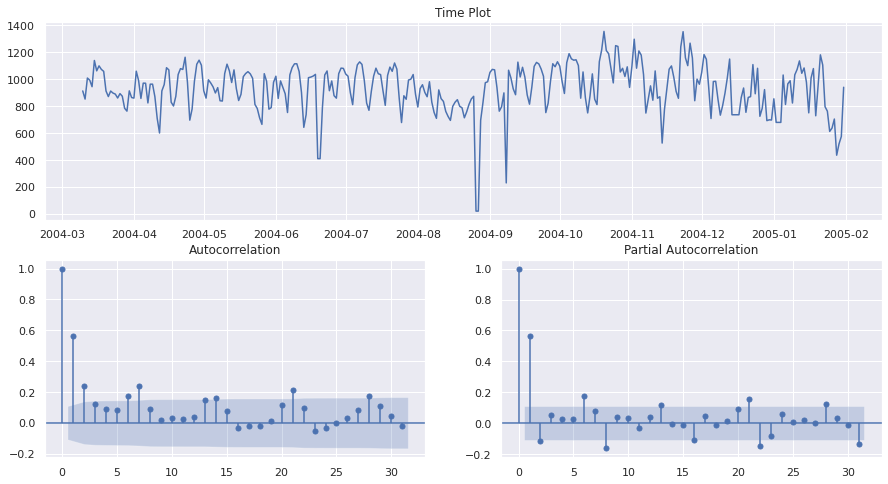

In [70]:
fig = ts_plot(train['NMHC'])

- Order identification is harder here
- Looking at the autocorrelation plot and the partial autocorrelation plot, both appear to tail off after lag 1. 
- This may indicate an ARMA(1,0,1) model

- Another view of the situation is that the ACF plot decays exponentially, while the PACF has a spike at lag one, suggesting an ARMA(1, 0, 0) model

###### Nitrogen Oxides

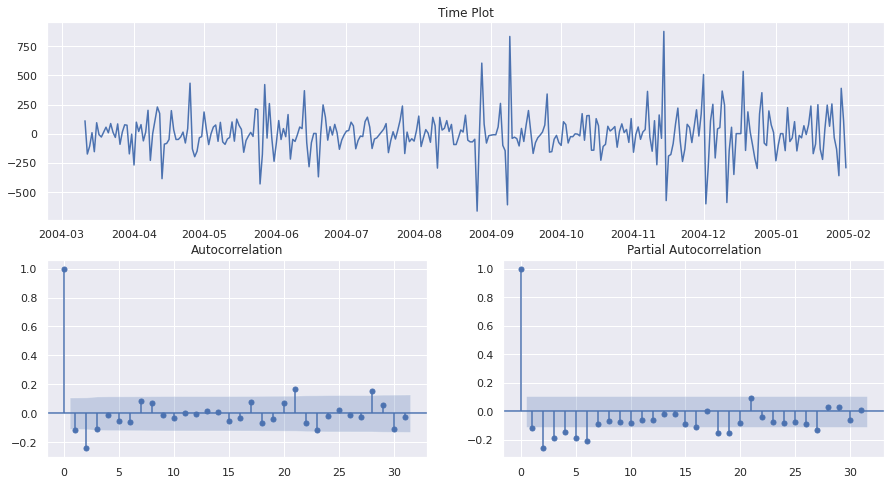

In [71]:
fig = ts_plot(diff(train['NOx']))

- Identification of the order is unclear here
- The autocrrelation plot shows that there are two spikes, with the rest very close to zero. The significant spike at lag 2, suggests a ARIMA(0, 1, 2) model

###### Ozone

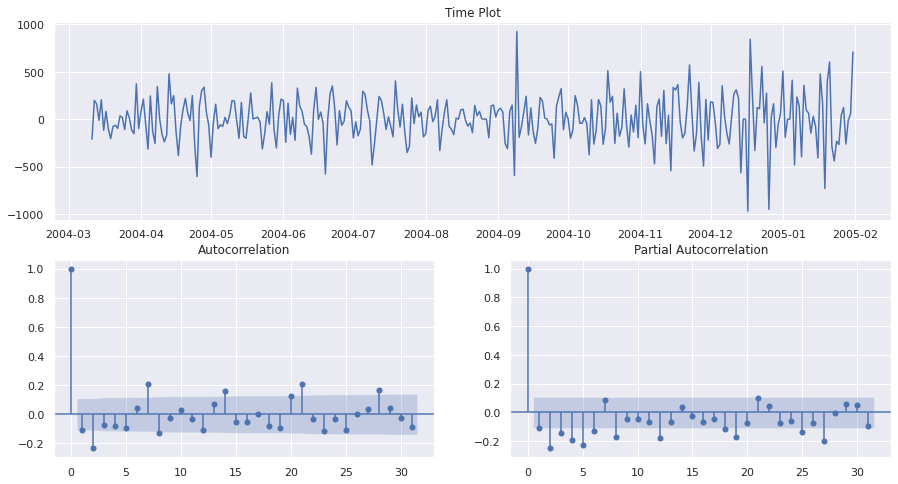

In [72]:
fig = ts_plot(diff(train['O3']))

- The ACF plot shows a few spikes, that occur at intervals of 7, suggesting a seasonal autoregressive term
- This suggests a ARIMA(0, 1, 2) model due to the spike at Lag 2 of the ACF plot

In [73]:
ARIMA_Results = defaultdict(list)
file_names = []
orders = {
    "CO" : (1, 0, 0),
    "NMHC" : (1, 0, 0),
    "NOx" : (0, 1, 2),
    "O3" : (0, 1, 2)
}
for gas in tqdm(gases):
    order = orders[gas]
    final_model, cv_metrics = eval_model(ARIMA, train[gas], model_params = {'order' : order})
    ARIMA_Results[gas] = cv_metrics
    file_name = generate_file_name(f"ARIMA-{order}-{gas}", date=False, location="models/ARIMA")
    file_names.append(file_name)
    final_model.save(file_name)
    history = record_history(f"ARIMA-{order}-{gas}", cv_metrics, gas)
results = parse_results(ARIMA_Results).describe()

100%|██████████| 4/4 [00:52<00:00, 13.13s/it]


##### Model Analysis

In [74]:
results.T

count         mean          std          min          25%  \
CO   Corrected AIC    5.0  2081.087395  1106.807887   702.082454  1387.907748   
     Train RMSE       5.0   119.770796    19.955859    97.614592   104.370269   
     Test RMSE        5.0   203.780849    47.934451   127.292479   187.595572   
     Final AICc       5.0  4235.842233     0.000000  4235.842233  4235.842233   
NMHC Corrected AIC    5.0  2093.363154  1109.401150   705.708212  1397.445767   
     Train RMSE       5.0   123.767597    18.706936   100.147136   113.034359   
     Test RMSE        5.0   184.375725    42.677172   127.356567   158.004777   
     Final AICc       5.0  4207.303345     0.000000  4207.303345  4207.303345   
NOx  Corrected AIC    5.0  2087.633210  1105.305670   712.024286  1395.732071   
     Train RMSE       5.0   128.554312    14.145936   114.396305   117.770324   
     Test RMSE        5.0   186.683114    52.418233   103.306063   166.265670   
     Final AICc       5.0  4237.602162     0.000000  4237.602162  4237.602162   
O3   Corrected AIC    5.0  2194.879680  1145.106188   761.439642  1470.293839   
     Train RMSE       5.0   181.562977     9.268350   171.305762   176.806747   
     Test RMSE        5.0   292.145983    68.291976   220.932102   225.374992   
     Final AICc       5.0  4471.038997     0.000000  4471.038997  4471.038997   

                            50%          75%          max  
CO   Corrected AIC  2018.018745  2806.433940  3490.994086  
     Train RMSE      116.074965   139.993725   140.800431  
     Test RMSE       227.185746   230.305255   246.525193  
     Final AICc     4235.842233  4235.842233  4235.842233  
NMHC Corrected AIC  2047.186016  2809.563486  3506.912287  
     Train RMSE      120.378797   141.426975   143.850716  
     Test RMSE       196.750617   201.661991   238.104674  
     Final AICc     4207.303345  4207.303345  4207.303345  
NOx  Corrected AIC  2038.570105  2776.171755  3515.667832  
     Train RMSE      126.263957   134.834264   149.506709  
     Test RMSE       217.146996   221.714023   224.982815  
     Final AICc     4237.602162  4237.602162  4237.602162  
O3   Corrected AIC  2171.800857  2907.175338  3663.688723  
     Train RMSE      181.446107   182.011245   196.245022  
     Test RMSE       307.057336   327.900000   379.465486  
     Final AICc     4471.038997  4471.038997  4471.038997

In [75]:
history.sort_values("Mean Test RMSE")

,Model Name,Mean Test RMSE,Final AICc,Gas
14,"ARIMA-(1, 0, 0)-NMHC",184.375725,4207.303345,NMHC
5,"ARIMA-(1, 0, 0)-NMHC",184.375725,4207.303345,NMHC
8,"ARIMA-(1, 0, 1)-NMHC",185.077665,4204.377005,NMHC
6,"ARIMA-(0, 1, 2)-NOx",186.683114,4237.602162,NOx
15,"ARIMA-(0, 1, 2)-NOx",186.683114,4237.602162,NOx
4,"ARIMA-(1, 0, 0)-CO",203.780849,4235.842233,CO
13,"ARIMA-(1, 0, 0)-CO",203.780849,4235.842233,CO
1,ExpSmoothingModel-NMHC,204.222223,3340.241747,NMHC
10,ExpSmoothingModel-NMHC,204.222223,3340.241747,NMHC
2,ExpSmoothingModel-NOx,210.039201,3388.009431,NOx


In terms of RMSE, the ARIMA models all outperform the Exponential Smoothing Models.

In [78]:
%%capture 
# ^suppress output
models = [load(file) for file in file_names]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    diagnostics = [model.plot_diagnostics() for model in models]


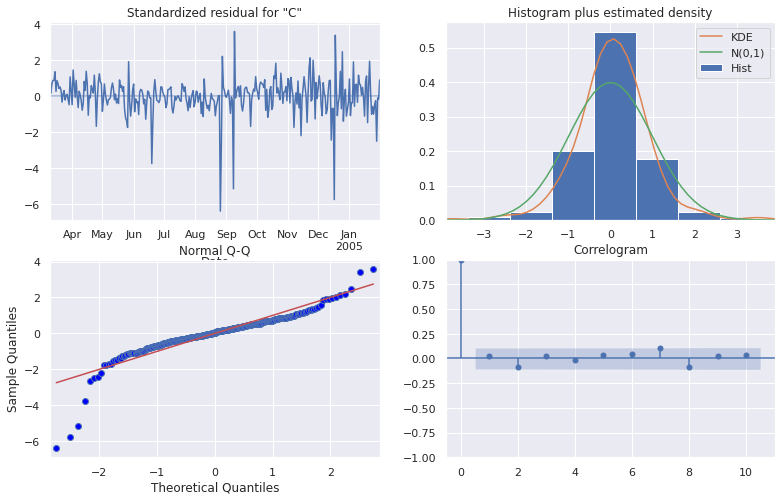

In [79]:
diagnostics[0]

- We observe from the Q-Q plot that the residuals are not normally distributed
- The correlogram does not show any significant correlation, except perhaps at Lag 7

In [80]:
models[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     CO   No. Observations:                  328
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2114.884
Date:                Fri, 06 Aug 2021   AIC                           4235.768
Time:                        14:13:45   BIC                           4247.147
Sample:                    03-10-2004   HQIC                          4240.308
                         - 01-31-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1070.4566     26.270     40.748      0.000    1018.968    1121.945
ar.L1          0.5999      0.026     23.032      0.000       0.549       0.651
sigma2      2.326e+04    842.337     27.610      0.000    2.16e+04    2.49e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):              1657.52
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               2.15   Skew:                            -1.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- We observe that all the coefficients in the ARIMA model for CO are significant.
- We note that the p-value obtained for the Ljung-Box test is 0.62, hence we would fail to reject the Null hypothesis of independently distributed residuals. Hence the residuals of this ARIMA model likely have no autocorrelation.

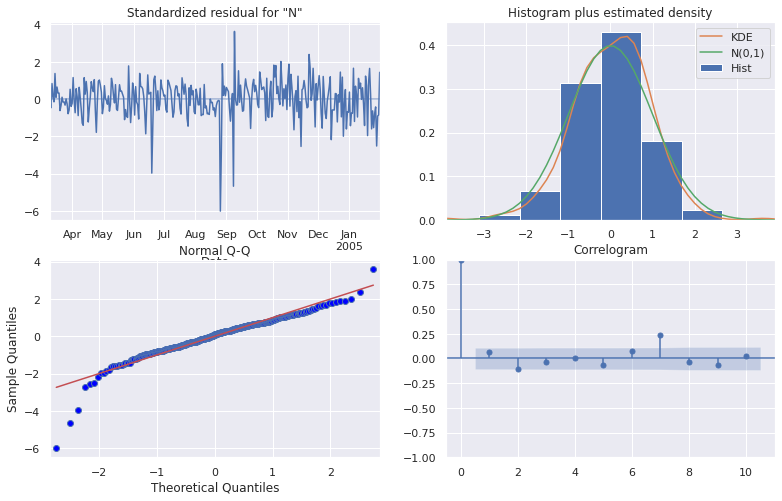

In [81]:
diagnostics[1]

- We observe that for NMHC:
    - Residuals are not normally distributed
    - There is significant correlation at Lag 7. This suggests that the ARIMA model fails to capture some sort of correlation that happens every week (i.e a seasonal pattern)

In [82]:
models[1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   NMHC   No. Observations:                  328
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2100.615
Date:                Fri, 06 Aug 2021   AIC                           4207.229
Time:                        14:13:53   BIC                           4218.608
Sample:                    03-10-2004   HQIC                          4211.769
                         - 01-31-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        931.2116     21.383     43.548      0.000     889.301     973.122
ar.L1          0.5628      0.033     17.189      0.000       0.499       0.627
sigma2      2.143e+04    969.832     22.098      0.000    1.95e+04    2.33e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.45   Jarque-Bera (JB):               469.14
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                            -1.11
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- We observe that all the coefficients in the ARIMA model for NMHC are significant.
- We note that the p-value obtained for the Ljung-Box test is 0.23, hence we would fail to reject the null hypothesis of no autocorrelation in the residuals if we had a significance level of 0.05.

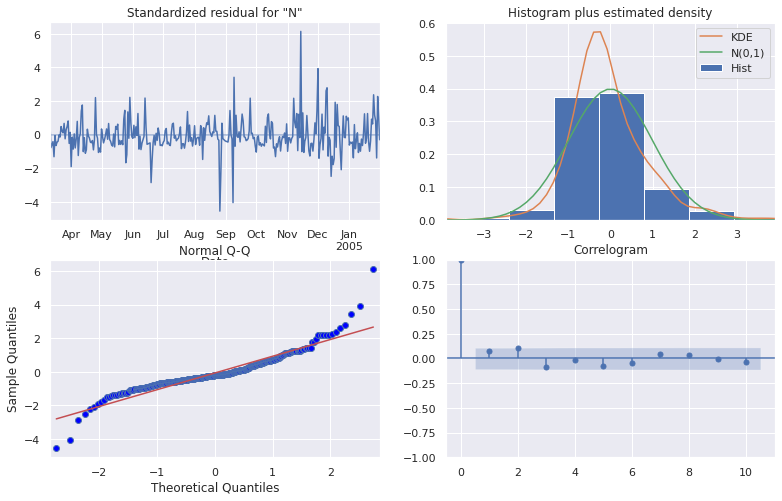

In [83]:
diagnostics[2]

- The residuals for NOx are certainly not normally distributed
- The correlogram does not show any significant correlation, except perhaps at Lag 2.

In [84]:
models[2].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    NOx   No. Observations:                  328
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -2115.764
Date:                Fri, 06 Aug 2021   AIC                           4237.528
Time:                        14:13:58   BIC                           4248.898
Sample:                    03-10-2004   HQIC                          4242.065
                         - 01-31-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4504      0.036    -12.382      0.000      -0.522      -0.379
ma.L2         -0.4856      0.044    -11.004      0.000      -0.572      -0.399
sigma2      2.428e+04    930.545     26.091      0.000    2.25e+04    2.61e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.75   Jarque-Bera (JB):               696.39
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               2.27   Skew:                             0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- We observe that all the coefficients in the ARIMA model for NOx are significant.
- We note that the p-value obtained for the Ljung-Box test is 0.19, hence we would fail to reject the null hypothesis of no autocorrelation in the residuals if we had a significance level of 0.05.

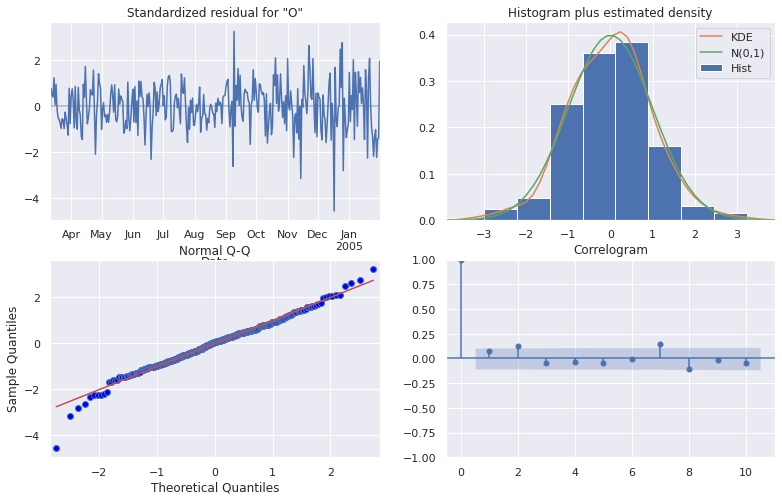

In [85]:
diagnostics[3]

- We observe that the residuals are mostly normally distributed
- There is one significant correlation at Lag 7, suggesting the ARIMA model does not account for seasonality that occurs on a weekly basis
- There is also a smaller correlation at Lag 2

In [86]:
models[3].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     O3   No. Observations:                  328
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -2232.482
Date:                Fri, 06 Aug 2021   AIC                           4470.965
Time:                        14:14:02   BIC                           4482.335
Sample:                    03-10-2004   HQIC                          4475.501
                         - 01-31-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3902      0.044     -8.845      0.000      -0.477      -0.304
ma.L2         -0.4889      0.048    -10.158      0.000      -0.583      -0.395
sigma2      4.961e+04   2994.017     16.569      0.000    4.37e+04    5.55e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.76   Jarque-Bera (JB):                28.21
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               2.61   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- We observe that all the coefficients in the ARIMA model for O3 are significant.
- We note that the p-value obtained for the Ljung-Box test is 0.18, hence we would fail to reject the null hypothesis of no autocorrelation in the residuals if we had a significance level of 0.05.

#### SARIMA

##### Identifying Seasonal Orders

The seasonal part of the model consists of terms that are similar to the non-seasonal components of the model, but involve backshifts of the seasonal period.

The seasonal part of an AR or MA model will be seen in the seasonal lags of the PACF and ACF. For example, an ARIMA(0,0,0)(0,0,1,12) model will show:

- a spike at lag 12 in the ACF but no other significant spikes;
- exponential decay in the seasonal lags of the PACF (i.e., at lags 12, 24, 36, …).

Similarly, an ARIMA(0,0,0)(1,0,0,12) model will show:

- exponential decay in the seasonal lags of the ACF;
- a single significant spike at lag 12 in the PACF.
In considering the appropriate seasonal orders for a seasonal ARIMA model, restrict attention to the seasonal lags.

To identify the seasonal order, we will take a seasonal difference of the data, and analyse the ACF and PACF plot. Based on our earlier analysis, the seasonal period appears to be one week (7 days)

###### Carbon Monoxide

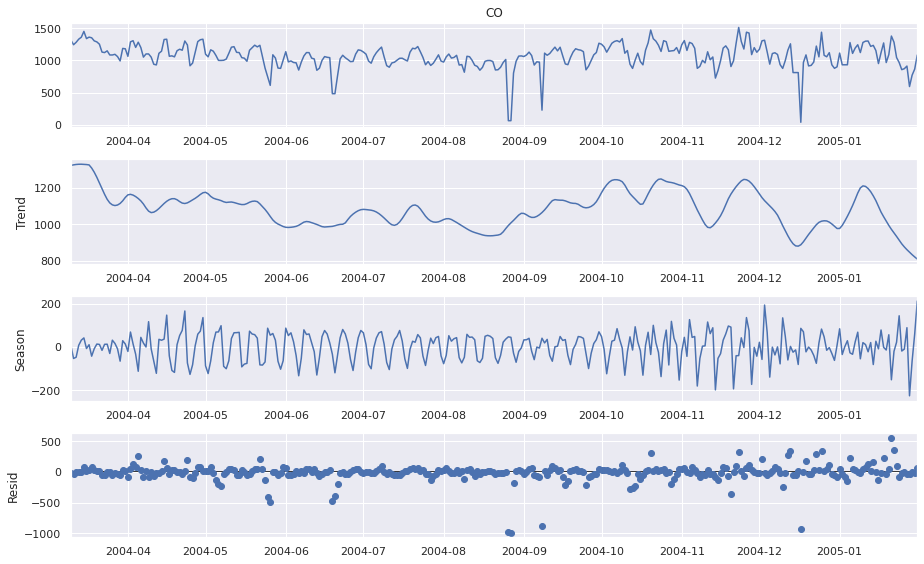

In [87]:
res = STL(df_basic_clean['CO'], robust=True).fit()
res.plot()
plt.show()

Looking at the decomposition of CO, there are four repeating seasons per month, suggesting Weekly seasons. 

In [88]:
decompose_df['Seasonal Strength']['CO']

0.06989822603269447

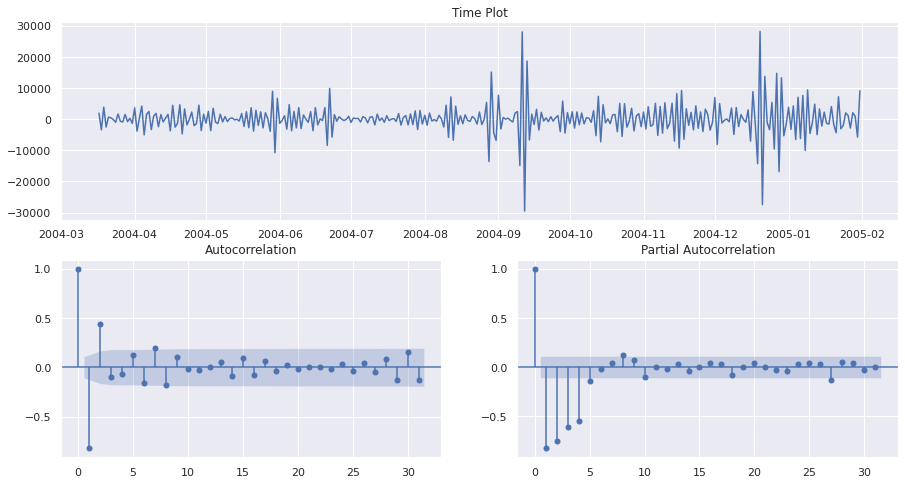

In [89]:
fig = ts_plot(diff(train['CO'], 7))

When taking a seasonal difference, we observe the ACF plot has two significant spikes at Lag 1 and Lag 2. We also observe that the PACF plot decays towards zero.

This suggests a SMA(2) term

ARIMA(1, 0, 0)(0, 0, 2, 7)

###### Non Metanic Hydrocarbons

In [90]:
decompose_df['Seasonal Strength']['NMHC']

0.22785812404595185

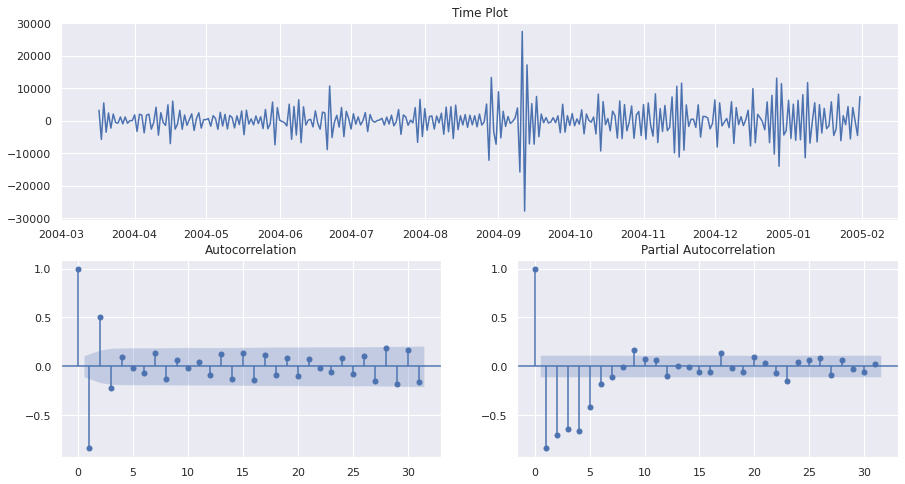

In [91]:
fig = ts_plot(diff(train['NMHC'], 7))

- This time series exhibits stronger seasonality. 
- The PACF plot decays exponentially to zero
- The ACF plot shows significant seasonal spikes at seasonal lags at 1 and 2, as well as a smaller spike at lag 3. 
- This might indicate a SARIMA(1, 0, 0)(0,1,2,7) -> We will be more conservative and choose SMA(2) instead of SMA(3)

###### Nitrogen Oxides

In [92]:
decompose_df['Seasonal Strength']['NOx']

0.10834906205123485

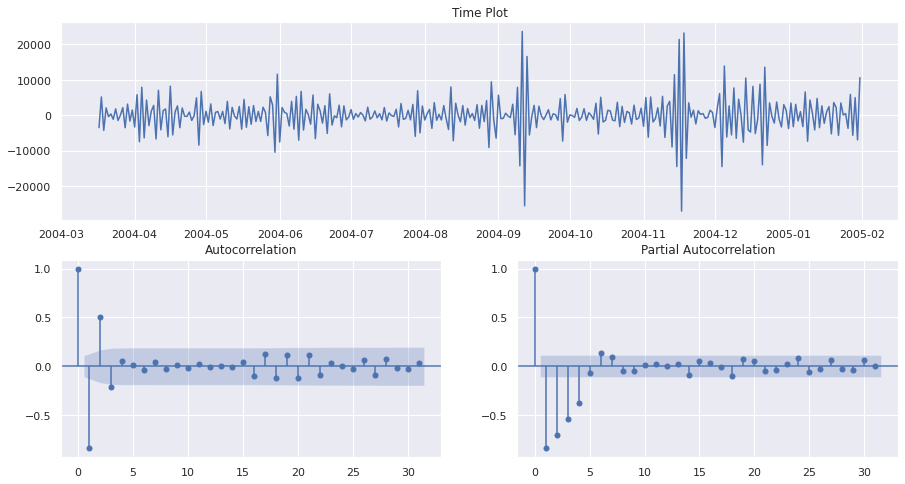

In [100]:
fig = ts_plot(diff(train['NOx'], 7))

- The PACF plot decays exponentially to zero
- The ACF plot shows significant seasonal spikes at seasonal lags at 1 and 2, as well as a smaller spike at lag 3. 
- This might indicate a SARIMA(1, 0, 0)(0,0,2,7) -> We will be more conservative and choose SMA(2) instead of SMA(3)

###### Ozone

In [94]:
decompose_df['Seasonal Strength']['O3']

0.2468281419458217

/home/tiencheng/mambaforge/envs/aiml/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



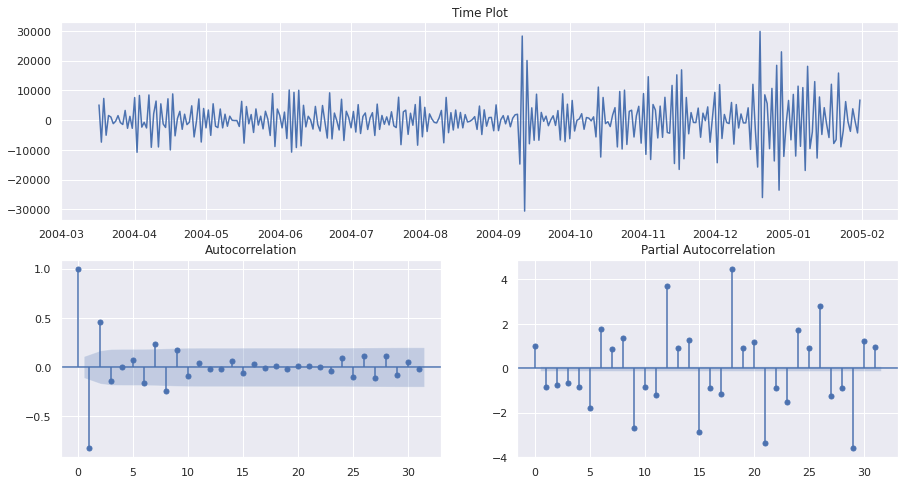

In [111]:
fig = ts_plot(diff(train['O3'], 7))

- The PACF has a sinusoidal pattern, but it is unclear if it converges towards zero.
- This suggests that we have overdifferenced our data.
- We will try to analyse the seasonality by looking at the ACF and PACF plot of first differences.

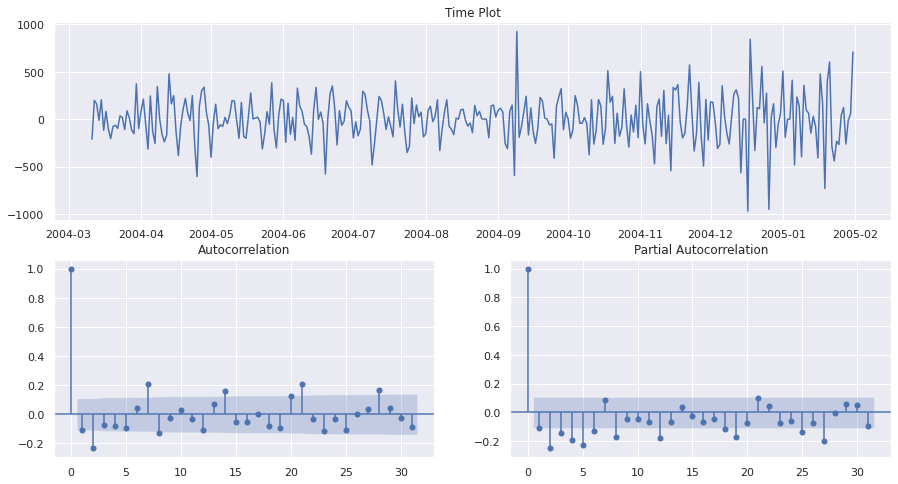

In [112]:
fig = ts_plot(diff(train['O3'], 1))

- From analysing the ACF plot, it suggests a SMA(3) or SMA(4) model

In [113]:
seasonal_orders = {
    "CO" : (0, 1, 2, 7),
    "NMHC" :  (0, 1, 2, 7),
    "NOx" :  (0, 1, 2, 7),
    "O3" :  (0, 1, 2, 7)
}
orders = {
    "CO" : (1, 0, 0),
    "NMHC" : (1, 0, 0),
    "NOx" : (0, 0, 2),
    "O3" : (0, 0, 2)
}
SARIMA_Results = defaultdict(list)
file_names = []

for gas in tqdm(gases):
    order = orders[gas]
    seasonal_order = seasonal_orders[gas] if gas in seasonal_orders else None
    final_model, cv_metrics = eval_model(SARIMAX, train[gas], model_params = {'order' : order} | ({'seasonal_order' : seasonal_order} if seasonal_order is not None else {}))
    SARIMA_Results[gas] = cv_metrics
    file_name = generate_file_name(f"SARIMA-{order}-{seasonal_order}-{gas}", date=False, location="models/SARIMA")
    file_names.append(file_name)
    final_model.save(file_name)
    history = record_history(f"SARIMA-{order}-{seasonal_order}-{gas}", cv_metrics, gas)
results = parse_results(SARIMA_Results).describe()

  0%|          | 0/4 [00:00<?, ?it/s]/home/tiencheng/mambaforge/envs/aiml/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/home/tiencheng/mambaforge/envs/aiml/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

 25%|██▌       | 1/4 [01:17<03:52, 77.36s/it]/home/tiencheng/mambaforge/envs/aiml/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

/home/tiencheng/mambaforge/envs/aiml/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

 50%|█████     | 2/4 [02:51<02:54, 87.36s/it]/home/tiencheng/mambaforge/envs/aiml/lib/

##### Model Analysis

In [114]:
results.T

count         mean          std          min          25%  \
CO   Corrected AIC    5.0  2112.833033  1123.840730   717.688511  1407.857593   
     Train RMSE       5.0   174.670155    18.737026   148.614603   172.294086   
     Test RMSE        5.0   289.680824   126.944633   107.804492   229.543504   
     Final AICc       5.0  4307.723385     0.000000  4307.723385  4307.723385   
NMHC Corrected AIC    5.0  2121.011361  1127.333438   715.691402  1415.225938   
     Train RMSE       5.0   155.474456    13.179946   134.463184   152.840229   
     Test RMSE        5.0   428.594450   103.295972   258.453425   413.716464   
     Final AICc       5.0  4272.394683     0.000000  4272.394683  4272.394683   
NOx  Corrected AIC    5.0  2342.500472  1180.885546   830.235298  1562.147664   
     Train RMSE       5.0   293.834350    54.597079   252.142737   257.528774   
     Test RMSE        5.0   774.775151    48.992387   741.419006   747.357570   
     Final AICc       5.0  4600.593589     0.000000  4600.593589  4600.593589   
O3   Corrected AIC    5.0  2390.609537  1235.853862   842.334899  1596.555217   
     Train RMSE       5.0   324.653851    40.385374   283.688057   304.022475   
     Test RMSE        5.0   970.572169   137.630460   827.913619   852.923828   
     Final AICc       5.0  4750.549960     0.000000  4750.549960  4750.549960   

                            50%          75%          max  
CO   Corrected AIC  2039.773179  2851.600899  3547.244981  
     Train RMSE      174.111496   176.933436   201.397155  
     Test RMSE       331.437280   335.177983   444.440859  
     Final AICc     4307.723385  4307.723385  4307.723385  
NMHC Corrected AIC  2058.062185  2859.293561  3556.783720  
     Train RMSE      157.200895   165.163569   167.704407  
     Test RMSE       458.933222   488.221876   523.647265  
     Final AICc     4272.394683  4272.394683  4272.394683  
NOx  Corrected AIC  2452.507302  3054.287264  3813.324830  
     Train RMSE      266.145298   311.211962   382.142978  
     Test RMSE       756.874931   767.628540   860.595706  
     Final AICc     4600.593589  4600.593589  4600.593589  
O3   Corrected AIC  2342.001135  3253.656081  3918.500352  
     Train RMSE      308.847889   339.121008   387.589824  
     Test RMSE       974.498698  1032.826332  1164.698370  
     Final AICc     4750.549960  4750.549960  4750.549960

In [115]:
history.sort_values(["Gas", "Mean Test RMSE"])

,Model Name,Mean Test RMSE,Final AICc,Gas
4,"ARIMA-(1, 0, 0)-CO",203.780849,4235.842233,CO
13,"ARIMA-(1, 0, 0)-CO",203.780849,4235.842233,CO
0,ExpSmoothingModel-CO,211.062717,3355.023956,CO
9,ExpSmoothingModel-CO,211.062717,3355.023956,CO
17,"SARIMA-(1, 0, 0)-(0, 0, 2, 7)-CO",289.680824,4307.723385,CO
5,"ARIMA-(1, 0, 0)-NMHC",184.375725,4207.303345,NMHC
14,"ARIMA-(1, 0, 0)-NMHC",184.375725,4207.303345,NMHC
8,"ARIMA-(1, 0, 1)-NMHC",185.077665,4204.377005,NMHC
1,ExpSmoothingModel-NMHC,204.222223,3340.241747,NMHC
10,ExpSmoothingModel-NMHC,204.222223,3340.241747,NMHC


#### VARMAX

### Model Improvement

#### Dynamic Regression Methods

##### ARIMAX

##### SARIMAX

#### Filtering Out Noise in the Data

#### Treatment of Outliers

#### Hyperparameter Tuning

##### Best Order

##### Trend

## Final Model

### Analysis of Order

### Analysis of Residuals

## Generating Kaggle Predictions

In [57]:
test_df = pd.read_csv("test.csv", index_col=0, na_values=[-200])
test_df["Date"] = pd.to_datetime(test_df["Date"], format="%d/%m/%Y")
test_df

,Date,T,RH,Gas
id,,,,
0,2005-02-01,6.616667,51.734375,CO
1,2005-02-02,7.613194,43.930903,CO
2,2005-02-03,7.252083,50.966667,CO
3,2005-02-04,7.473611,50.166319,CO
4,2005-02-05,5.571875,46.604167,CO
...,...,...,...,...
247,2005-03-31,17.554167,50.092708,O3
248,2005-04-01,15.919792,35.959722,O3
249,2005-04-02,15.489583,32.213542,O3


In [58]:
test, missing_days = DataPreprocess(test_df, train=False, remove_outliers=True, impute=True)

### Utility Functions

In [63]:
def generate_csv(test_data, test_preds, missing_days):
    test_preds = np.array(test_preds).flatten()
    submit_df = pd.DataFrame({
    'id' : test_data.index,
    'Value' : test_preds
})
    submit_df.iloc[missing_days, 1] = -200 # replace days where sensor records were missing with -200 (NaN)
    submit_df.to_csv(generate_file_name("submission", "csv", "submissions", date=True), index=False)

In [60]:
def generate_submission(models, test, missing_days):
    preds = []
    for gas in gases:
        model = load(models[gas])
        data = test[test['Gas'] == gas]
        forecasts = []
        start, end = data['Date'].iloc[0], data['Date'].iloc[-1]
        for date in pd.date_range(start, end):
            forecast = model.predict(start=date)
            forecast.name = gas
            forecasts.append(forecast)
            model = model.append(forecast, refit=True)
        preds.append(forecasts)

    generate_csv(test, preds, missing_days)
    return preds

### Submission

In [61]:
models = {"CO" : "models/SARIMA/SARIMA-(1, 0, 0)-(0, 1, 2, 7)-CO.pkl",
    "NMHC" : "models/SARIMA/SARIMA-(1, 0, 0)-(0, 1, 2, 7)-NMHC.pkl",
    "NOx" : "models/SARIMA/SARIMA-(0, 0, 2)-(0, 1, 2, 7)-NOx.pkl",
    "O3" : "models/SARIMA/SARIMA-(0, 0, 2)-(0, 1, 2, 7)-O3.pkl"
}

In [64]:
generate_submission(models, test, missing_days)

[[2005-02-01    1100.487901
  Freq: D, Name: CO, dtype: float64,
  2005-02-02    1080.953327
  Freq: D, Name: CO, dtype: float64,
  2005-02-03    1091.171727
  Freq: D, Name: CO, dtype: float64,
  2005-02-04    1036.923751
  Freq: D, Name: CO, dtype: float64,
  2005-02-05    1039.85309
  Freq: D, Name: CO, dtype: float64,
  2005-02-06    982.468177
  Freq: D, Name: CO, dtype: float64,
  2005-02-07    1063.557476
  Freq: D, Name: CO, dtype: float64,
  2005-02-08    1105.597333
  Freq: D, Name: CO, dtype: float64,
  2005-02-09    1088.109656
  Freq: D, Name: CO, dtype: float64,
  2005-02-10    1101.093201
  Freq: D, Name: CO, dtype: float64,
  2005-02-11    1077.627027
  Freq: D, Name: CO, dtype: float64,
  2005-02-12    1064.965586
  Freq: D, Name: CO, dtype: float64,
  2005-02-13    992.7121
  Freq: D, Name: CO, dtype: float64,
  2005-02-14    1059.857342
  Freq: D, Name: CO, dtype: float64,
  2005-02-15    1103.388501
  Freq: D, Name: CO, dtype: float64,
  2005-02-16    1086.785494
  